# PROBABILITY DENSITY FUNCTION AND CUMULATIVE DENSITY FUNCTION

This notebook is for creating PDF and CDF plots for the BOC and EOC. 

In [1]:
import datetime
from matplotlib import pyplot
import numpy as np
from numpy import mean
from numpy import std
from scipy.stats import norm
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import math
import scipy
from pyemd import emd_samples

### Importing data 
This notebook is to be used after cutouts are made and model data is acquired. 

In [3]:
model_colors = pd.read_excel("model_colors.xlsx",header=0,index_col=0)

In [4]:
# All CMIP6 models: 
CMIP6_models = ['EC-Earth3', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR','HadGEM3-GC31-MM', 'HadGEM3-GC31-LL', 'AWI-CM-1-1-MR','IPSL-CM6A-LR','EC-Earth3-Veg','ACCESS-CM2']
CMIP6_models_wind = ['EC-Earth3','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','HadGEM3-GC31-MM','HadGEM3-GC31-LL','AWI-CM-1-1-MR','IPSL-CM6A-LR','EC-Earth3-Veg'] #wind
CMIP6_models_solar = ['EC-Earth3', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR','HadGEM3-GC31-MM','HadGEM3-GC31-LL','AWI-CM-1-1-MR','IPSL-CM6A-LR','ACCESS-CM2']
ssp_variants = ['ssp585']

In [5]:
########## WIND ################# - NB ALL THESE VALUES ARE TESTED, THEY ARE CORRECTLY CORRECTED - THEA 2/12
CMIP6_models = CMIP6_models_wind
ssp_variants = ['ssp585']
variable = 'wnd90m'

date_format = "%Y-%m-%d"
# Define cutout time duration: 
start_date = "2015-01-01"
end_date = "2022-12-31"

yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000

for i in CMIP6_models:
    i = i.replace("-", "_")     # Replacing - with _ for all CMIP6 model names
    for j in ssp_variants:
        variablename = f'Corrected_Europe_{i}_{j}_{yy_start}_{yy_end}_{variable}'
        savedpath = f"E:\\Master's\Corrected wnd90m for CMIP6 models\BOC\{variablename}.nc"
        print(f'"{variablename}" retrieved from path: {savedpath}')
        locals()[variablename] = xr.open_dataset(savedpath)
        locals()[variablename] = locals()[variablename]["__xarray_dataarray_variable__"].load()

"Corrected_Europe_EC_Earth3_ssp585_15_22_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\BOC\Corrected_Europe_EC_Earth3_ssp585_15_22_wnd90m.nc
"Corrected_Europe_MIROC6_ssp585_15_22_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\BOC\Corrected_Europe_MIROC6_ssp585_15_22_wnd90m.nc
"Corrected_Europe_MPI_ESM1_2_HR_ssp585_15_22_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\BOC\Corrected_Europe_MPI_ESM1_2_HR_ssp585_15_22_wnd90m.nc
"Corrected_Europe_MPI_ESM1_2_LR_ssp585_15_22_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\BOC\Corrected_Europe_MPI_ESM1_2_LR_ssp585_15_22_wnd90m.nc
"Corrected_Europe_HadGEM3_GC31_MM_ssp585_15_22_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\BOC\Corrected_Europe_HadGEM3_GC31_MM_ssp585_15_22_wnd90m.nc
"Corrected_Europe_HadGEM3_GC31_LL_ssp585_15_22_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\BOC\Co

In [6]:
variablename = f'Europe_EC_Earth3_ssp585_15_22_wnd90m_power_law_GWA_corrected_no_indicator_matrix'
savedpath = f"E:\\Master's\Corrected wnd90m for CMIP6 models\BOC\{variablename}.nc"
print(f'"{variablename}" retrieved from path: {savedpath}')
locals()[variablename] = xr.open_dataset(savedpath)
locals()[variablename] = locals()[variablename]["__xarray_dataarray_variable__"].load()

"Europe_EC_Earth3_ssp585_15_22_wnd90m_power_law_GWA_corrected_no_indicator_matrix" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\BOC\Europe_EC_Earth3_ssp585_15_22_wnd90m_power_law_GWA_corrected_no_indicator_matrix.nc


In [7]:
########## SOLAR ################# - NB ALL THESE VALUES ARE TESTED, THEY ARE CORRECTLY CORRECTED - THEA 2/12
CMIP6_models = CMIP6_models_solar
ssp_variants = ['ssp585']
variable = 'influx'

date_format = "%Y-%m-%d"
# Define cutout time duration: 
start_date = "2015-01-01"
end_date = "2022-12-31"

yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000

for i in CMIP6_models:
    i = i.replace("-", "_")     # Replacing - with _ for all CMIP6 model names
    for j in ssp_variants:
        variablename = f'Corrected_Europe_{i}_{j}_{yy_start}_{yy_end}_{variable}'
        savedpath = f"E:\\Master's\Corrected influx for CMIP6 models\BOC\{variablename}.nc"
        print(f'"{variablename}" retrieved from path: {savedpath}')
        locals()[variablename] = xr.open_dataset(savedpath)
        locals()[variablename] = locals()[variablename]["__xarray_dataarray_variable__"].load()
        locals()[variablename] = locals()[variablename].where(locals()[variablename]>0.01,drop=False)  #Dropping values of 0

"Corrected_Europe_EC_Earth3_ssp585_15_22_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\BOC\Corrected_Europe_EC_Earth3_ssp585_15_22_influx.nc
"Corrected_Europe_MIROC6_ssp585_15_22_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\BOC\Corrected_Europe_MIROC6_ssp585_15_22_influx.nc
"Corrected_Europe_MPI_ESM1_2_HR_ssp585_15_22_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\BOC\Corrected_Europe_MPI_ESM1_2_HR_ssp585_15_22_influx.nc
"Corrected_Europe_MPI_ESM1_2_LR_ssp585_15_22_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\BOC\Corrected_Europe_MPI_ESM1_2_LR_ssp585_15_22_influx.nc
"Corrected_Europe_HadGEM3_GC31_MM_ssp585_15_22_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\BOC\Corrected_Europe_HadGEM3_GC31_MM_ssp585_15_22_influx.nc
"Corrected_Europe_HadGEM3_GC31_LL_ssp585_15_22_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\BOC\Co

In [8]:
### corrected (by GWA) era5 for europe - at 90m, 3hr and coarse resolution - THIS IS CORRECT
savedpath = f"E:\\Master's\ERA5\wnd90m\Europe_era5_15_22_wnd90m_3hr_corrected.nc"
Europe_era5_15_22_wnd90m_3hr_corrected = xr.open_dataarray(savedpath)
Europe_era5_15_22_wnd90m_3hr_corrected = Europe_era5_15_22_wnd90m_3hr_corrected.load()

In [9]:
### LOADING ERA5 INFLUX (AT 3hourly VALUES!) - THIS ONE IS CORRECT!! 
savedpath = f"E:\\Master's\ERA5\influx\Europe_era5_15_22_influx_3hr_correct.nc"
Europe_era5_15_22_influx_3hr = xr.open_dataset(savedpath)
Europe_era5_15_22_influx_3hr =Europe_era5_15_22_influx_3hr["__xarray_dataarray_variable__"].load()
Europe_era5_15_22_influx_3hr = Europe_era5_15_22_influx_3hr.where(Europe_era5_15_22_influx_3hr>0.01,drop=False)  #Dropping values of 0

In [10]:
########## WIND EOC ################# 
CMIP6_models = CMIP6_models_wind
ssp_variants = ['ssp585']
variable = 'wnd90m'

date_format = "%Y-%m-%d"
# Define cutout time duration: 
start_date = "2070-01-01"
end_date = "2099-12-31"

yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000

for i in CMIP6_models:
    i = i.replace("-", "_")     # Replacing - with _ for all CMIP6 model names
    for j in ssp_variants:
        variablename = f'Corrected_Europe_{i}_{j}_{yy_start}_{yy_end}_{variable}'
        savedpath = f"E:\\Master's\Corrected wnd90m for CMIP6 models\EOC\{variablename}.nc"
        print(f'"{variablename}" retrieved from path: {savedpath}')
        locals()[variablename] = xr.open_dataset(savedpath)
        locals()[variablename] = locals()[variablename]["__xarray_dataarray_variable__"].load()

"Corrected_Europe_EC_Earth3_ssp585_70_99_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\EOC\Corrected_Europe_EC_Earth3_ssp585_70_99_wnd90m.nc
"Corrected_Europe_MIROC6_ssp585_70_99_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\EOC\Corrected_Europe_MIROC6_ssp585_70_99_wnd90m.nc
"Corrected_Europe_MPI_ESM1_2_HR_ssp585_70_99_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\EOC\Corrected_Europe_MPI_ESM1_2_HR_ssp585_70_99_wnd90m.nc
"Corrected_Europe_MPI_ESM1_2_LR_ssp585_70_99_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\EOC\Corrected_Europe_MPI_ESM1_2_LR_ssp585_70_99_wnd90m.nc
"Corrected_Europe_HadGEM3_GC31_MM_ssp585_70_99_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\EOC\Corrected_Europe_HadGEM3_GC31_MM_ssp585_70_99_wnd90m.nc
"Corrected_Europe_HadGEM3_GC31_LL_ssp585_70_99_wnd90m" retrieved from path: E:\Master's\Corrected wnd90m for CMIP6 models\EOC\Co

In [11]:
########## SOLAR ################# - NB ALL THESE VALUES ARE TESTED, THEY ARE CORRECTLY CORRECTED - THEA 2/12
CMIP6_models = CMIP6_models_solar
ssp_variants = ['ssp585']
variable = 'influx'

date_format = "%Y-%m-%d"
# Define cutout time duration: 
start_date = "2070-01-01"
end_date = "2099-12-31"

yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000

for i in CMIP6_models:
    i = i.replace("-", "_")     # Replacing - with _ for all CMIP6 model names
    for j in ssp_variants:
        variablename = f'Corrected_Europe_{i}_{j}_{yy_start}_{yy_end}_{variable}'
        savedpath = f"E:\\Master's\Corrected influx for CMIP6 models\EOC\{variablename}.nc"
        print(f'"{variablename}" retrieved from path: {savedpath}')
        locals()[variablename] = xr.open_dataset(savedpath)
        locals()[variablename] = locals()[variablename]["__xarray_dataarray_variable__"].load()
        locals()[variablename] = locals()[variablename].where(locals()[variablename]>0.01,drop=False)  #Dropping values of 0

"Corrected_Europe_EC_Earth3_ssp585_70_99_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\EOC\Corrected_Europe_EC_Earth3_ssp585_70_99_influx.nc
"Corrected_Europe_MIROC6_ssp585_70_99_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\EOC\Corrected_Europe_MIROC6_ssp585_70_99_influx.nc
"Corrected_Europe_MPI_ESM1_2_HR_ssp585_70_99_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\EOC\Corrected_Europe_MPI_ESM1_2_HR_ssp585_70_99_influx.nc
"Corrected_Europe_MPI_ESM1_2_LR_ssp585_70_99_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\EOC\Corrected_Europe_MPI_ESM1_2_LR_ssp585_70_99_influx.nc
"Corrected_Europe_HadGEM3_GC31_MM_ssp585_70_99_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\EOC\Corrected_Europe_HadGEM3_GC31_MM_ssp585_70_99_influx.nc
"Corrected_Europe_HadGEM3_GC31_LL_ssp585_70_99_influx" retrieved from path: E:\Master's\Corrected influx for CMIP6 models\EOC\Co

# PDF - BOC
Making PDF plots for validation use - meaning for the BOC period for both ERA5 and CMIP6 models

### wnd90m

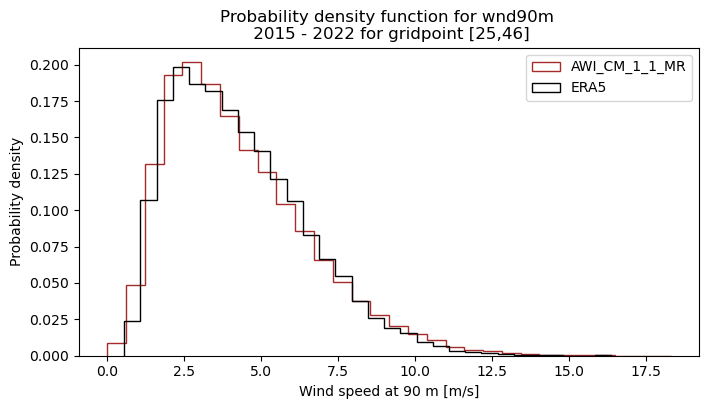

In [12]:
### Plotting the theoretical CL's and ACFs
grid_coords = [25,46]
variable = "wnd90m"
CMIP6_models = ['AWI-CM-1-1-MR']
# CMIP6_models = CMIP6_models_wind

yy_start = 15
yy_end = 22
bins = 30


fig,ax = plt.subplots(figsize=(8,4))
legend = []
for CMIP6_model in CMIP6_models:
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    CMIP6_model =CMIP6_model.replace('-','_')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_{yy_start}_{yy_end}_wnd90m"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= plotcolor)
    legend.append(f"{CMIP6_model}")

# ERA5
ax.hist(Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'])
legend.append(f"ERA5")
    
ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('Probability density')
ax.set_title(f"Probability density function for {variable} \n 20{yy_start} - 20{yy_end} for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.legend(legend)

In [32]:
### Used for creating the EMD dataframe - commented out as have been done already.

# grid_infos = ['x17_y64','x26_y59','xneg1_y52','x10_y51','x25_y46','xneg4_y40']

# # DataFrame to store EMD for PDF from each model at each point to the ERA5 value
# EMD_PDF_wnd90m_30bins_probability = pd.DataFrame(np.zeros([len(CMIP6_models_wind),len(grid_infos)]),index=CMIP6_models_wind,columns=grid_infos)

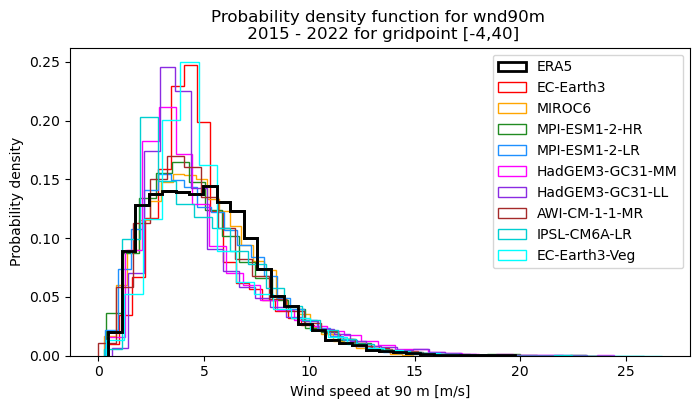

In [13]:
### Plotting all model wind PDF's at a certain reference location.
grid_coords = [-4,40]
variable = "wnd90m"
# CMIP6_models = ['EC-Earth3','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','HadGEM3-GC31-MM','HadGEM3-GC31-LL','AWI-CM-1-1-MR','IPSL-CM6A-LR','EC-Earth3-Veg'] #wind
CMIP6_models = CMIP6_models_wind


yy_start = 15
yy_end = 22
bins = 30

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"


fig,ax = plt.subplots(figsize=(8,4))
legend = []

# ERA5
wnd90m_era5 = Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how="any")
hist_ERA5 = ax.hist(wnd90m_era5,bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'],linewidth = 2)
legend.append(f"ERA5")

for CMIP6_model in CMIP6_models:
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    legend.append(f"{CMIP6_model}")
    CMIP6_model =CMIP6_model.replace('-','_')
    wnd90m_cmip = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_{yy_start}_{yy_end}_{variable}"].sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how="any")
    hist_CMIP = ax.hist(wnd90m_cmip,bins=bins,density=True,histtype=u'step',color= plotcolor)
    # EMD_PDF_wnd90m_30bins[grid_info][CMIP6_model.replace('_','-')] = emd_samples(wnd90m_era5,wnd90m_cmip,bins=bins)

hist_ERA5 = ax.hist(Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'],linewidth = 2)    
ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('Probability density')
ax.set_title(f"Probability density function for {variable} \n 20{yy_start} - 20{yy_end} for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.legend(legend)

In [123]:
# Save the plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/BOC/PDF/PDF_{variable}_all_models_{grid_info}.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/BOC/PDF/PDF_wnd90m_all_models_xneg4_y40.png'

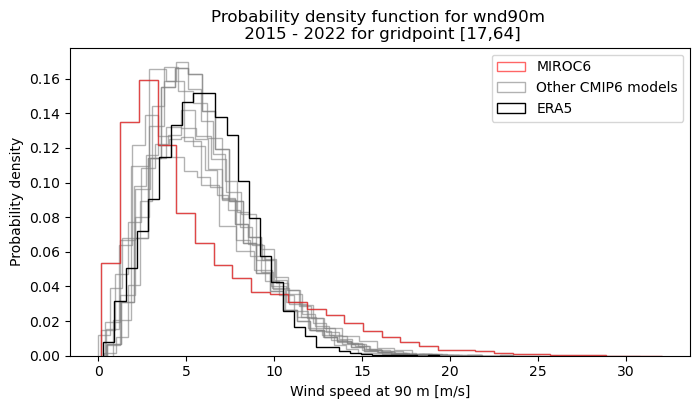

In [15]:
### Plotting all model wind PDF's at a certain location - with focus on seeing if / how much MIROC6 stands out
grid_coords = [17,64]
variable = "wnd90m"
# CMIP6_models = ['EC-Earth3','EC-Earth3-Veg']
CMIP6_models = CMIP6_models_wind

yy_start = 15
yy_end = 22
bins = 30
if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"

fig,ax = plt.subplots(figsize=(8,4))
for CMIP6_model in CMIP6_models:
    plotcolor = 'gray'
    CMIP6_model =CMIP6_model.replace('-','_')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_{yy_start}_{yy_end}_wnd90m"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,alpha = 0.6)

ax.hist(locals()[f"Corrected_Europe_MIROC6_ssp585_{yy_start}_{yy_end}_wnd90m"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= 'red',alpha = 0.6,label='MIROC6')
ax.hist(locals()[f"Corrected_Europe_EC_Earth3_ssp585_{yy_start}_{yy_end}_wnd90m"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= 'gray',alpha = 0.6,label='Other CMIP6 models')
# ERA5
ax.hist(Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'],label='ERA5')

ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('Probability density')
ax.set_title(f"Probability density function for {variable} \n 20{yy_start} - 20{yy_end} for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.legend()

In [113]:
# Save the plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/BOC/PDF/PDF_{variable}_MIROC6bad_{grid_info}.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/BOC/PDF/PDF_wnd90m_MIROC6bad_xneg4_y40.png'

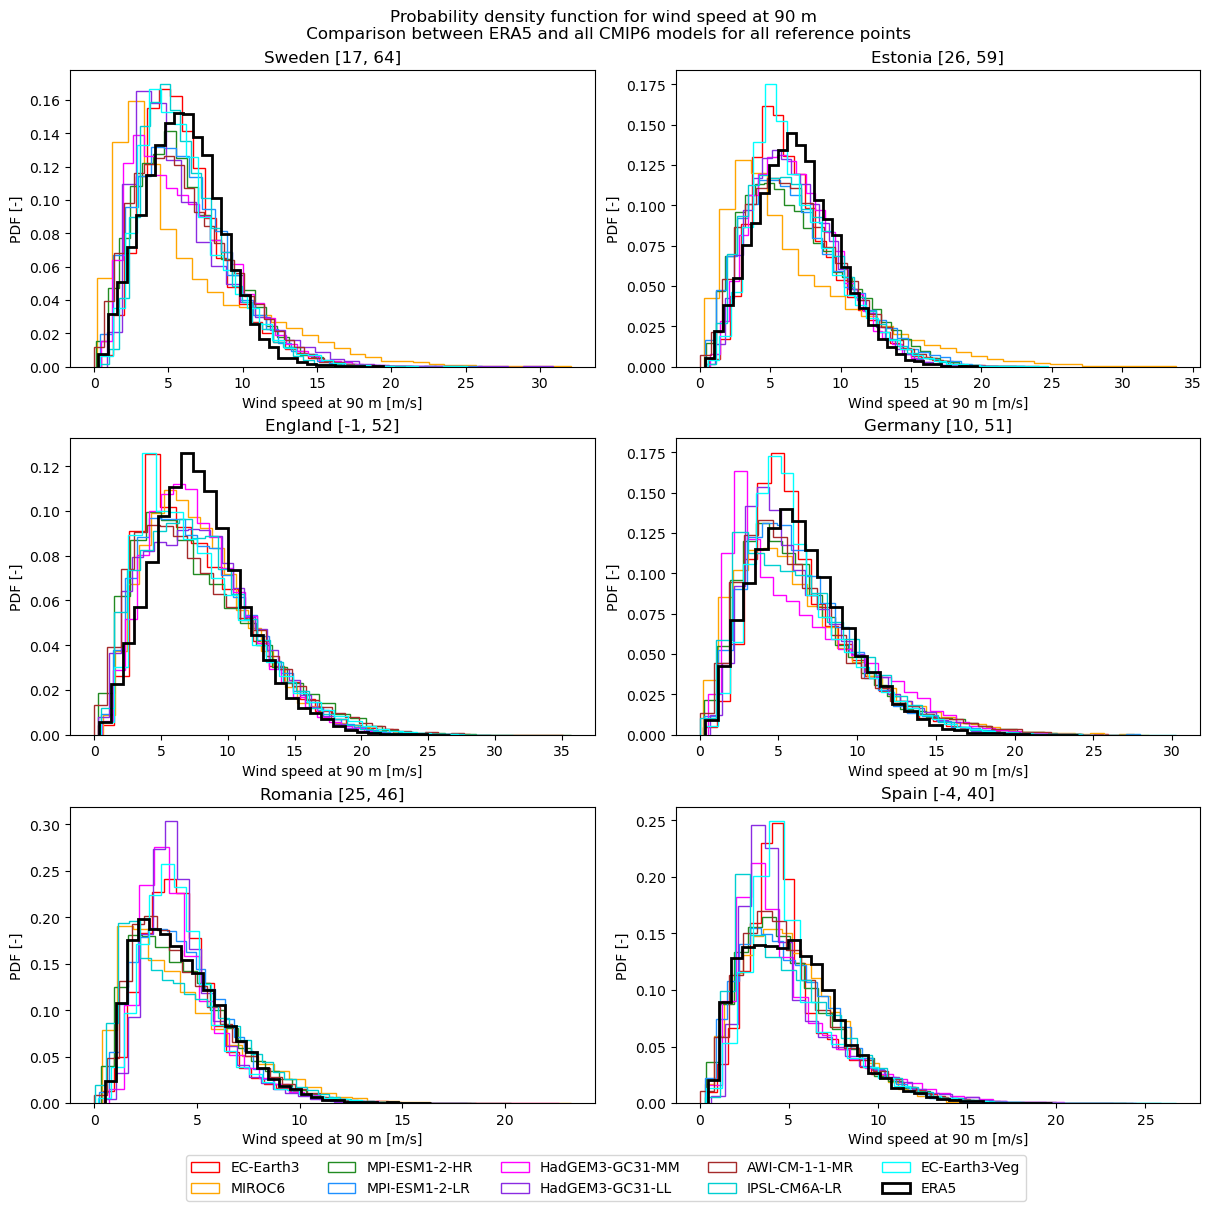

In [26]:
### All CMIP6 models compared to ERA5 for all reference locations for wind
### WND90M ########
variable = "wnd90m"
CMIP6_models = CMIP6_models_wind
bins = 30


point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

# Intraanual variability for specific points in 1 plot:
legend_mod = False;
ssp_variant = 'ssp585'
fig,axs = plt.subplots(3,2,figsize=(12,12),layout='constrained')
title = f'Probability density function for wind speed at 90 m \n Comparison between ERA5 and all CMIP6 models for all reference points'
fig.suptitle(title)

legend = []
for ii in range(6):
    point_name = f'point_{ii+1}';
    point = locals()[point_name];
    country_name = ref_country[ii]
   
    # data_df['mean'].plot(ax=axs.flat[ii],linewidth=3,legend=legend_mod,label=f'GWA-corrected ERA5 (reference)', color='black')
    # Monthly_mean['ERA5'] = data_df['mean']
        
    for CMIP6_model in CMIP6_models:
        plotcolor = model_colors.loc[CMIP6_model]['Color']
        if ii == 0: 
            legend.append(f"{CMIP6_model}")
        CMIP6_model =CMIP6_model.replace('-','_')
        axs.flat[ii].hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_wnd90m"].sel(x=point[0],y=point[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-')
    
    axs.flat[ii].hist(Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=point[0],y=point[1]),bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'],linewidth = 2)
    
    if ii == 0: legend.append(f"ERA5")
    
    # axs.flat[ii].legend(legend)
    axs.flat[ii].set_ylabel('PDF [-]')
    axs.flat[ii].set(xlabel='Wind speed at 90 m [m/s]')
    axs.flat[ii].set_title(f'{country_name} [{point[0]}, {point[1]}]')

fig.legend(legend,ncols=5,loc='outside lower center')

### Influx

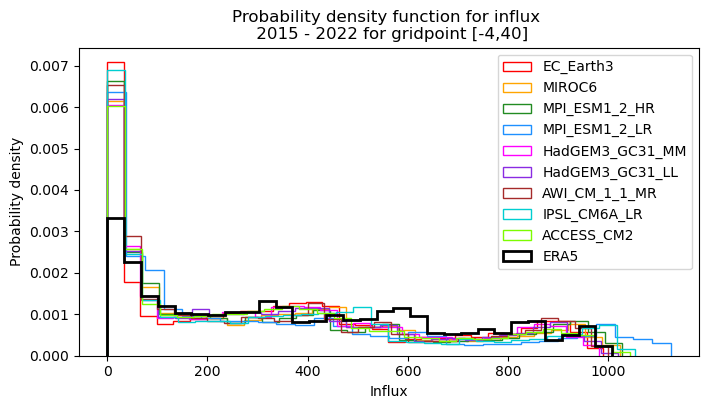

In [17]:
### Plotting all model wind PDF's at a certain reference location.
grid_coords = [-4,40]
variable = "influx"
CMIP6_models = CMIP6_models_solar

yy_start = 15
yy_end = 22

bins = 30

fig,ax = plt.subplots(figsize=(8,4))
legend = []
for CMIP6_model in CMIP6_models:
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    CMIP6_model =CMIP6_model.replace('-','_')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_{yy_start}_{yy_end}_{variable}"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= plotcolor)
    legend.append(f"{CMIP6_model}")

# ERA5
ax.hist(Europe_era5_15_22_influx_3hr.sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'],linewidth=2)
legend.append(f"ERA5")
    
ax.set_xlabel('Influx')
ax.set_ylabel('Probability density')
ax.set_title(f"Probability density function for {variable} \n 20{yy_start} - 20{yy_end} for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
# ax.set_xlim([0,200])
ax.legend(legend)

In [245]:
### Used for making the EMD dataframe - commented out as has been done already.

# grid_infos = ['x17_y64','x26_y59','xneg1_y52','x10_y51','x25_y46','xneg4_y40']

# # DataFrame to store EMD for PDF from each model at each point to the ERA5 value
# EMD_PDF_influx_20bins = pd.DataFrame(np.zeros([len(CMIP6_models_solar),len(grid_infos)]),index=CMIP6_models_solar,columns=grid_infos)

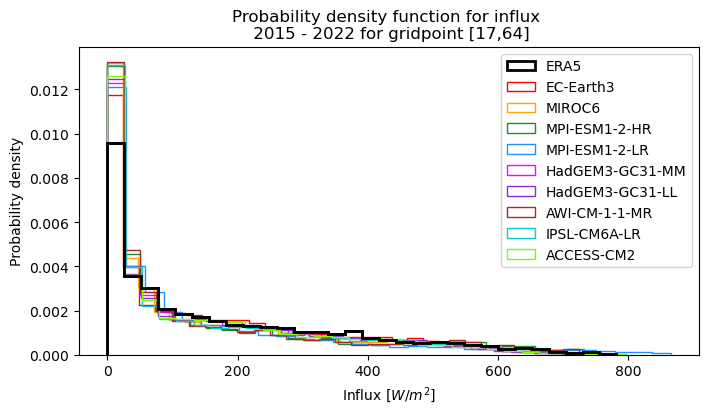

In [19]:
### Plotting the theoretical CL's and ACFs
grid_coords = [17,64]
variable = "influx"
# CMIP6_models = ['EC-Earth3','MIROC6']
CMIP6_models = CMIP6_models_solar

yy_start = 15
yy_end = 22
bins = 30

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"

fig,ax = plt.subplots(figsize=(8,4))
legend = []
# ERA5
influx_era5 = Europe_era5_15_22_influx_3hr.sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how="any")
(n_ERA5,bins_ERA5,patches_ERA5) = ax.hist(influx_era5,bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'],linewidth=2)
legend.append(f"ERA5")


for CMIP6_model in CMIP6_models:
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    legend.append(f"{CMIP6_model}")
    CMIP6_model =CMIP6_model.replace('-','_')
    influx_cmip = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_{yy_start}_{yy_end}_{variable}"].sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how="any")
    (n_CMIP,bins_CMIP,patches_CMIP) =  ax.hist(influx_cmip,bins=bins,density=True,histtype=u'step',color= plotcolor)
    # EMD_PDF_influx_20bins[grid_info][CMIP6_model.replace('_','-')] = emd_samples(influx_era5,influx_cmip,bins=bins)
ax.hist(influx_era5,bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'],linewidth=2)

ax.set_xlabel('Influx $[W/m^2]$')
ax.set_ylabel('Probability density')
ax.set_title(f"Probability density function for {variable} \n 20{yy_start} - 20{yy_end} for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
# ax.set_xlim([0,200])
ax.legend(legend)

In [ ]:
# Save the plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/BOC/PDF/PDF_{variable}_all_models_{grid_info}.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

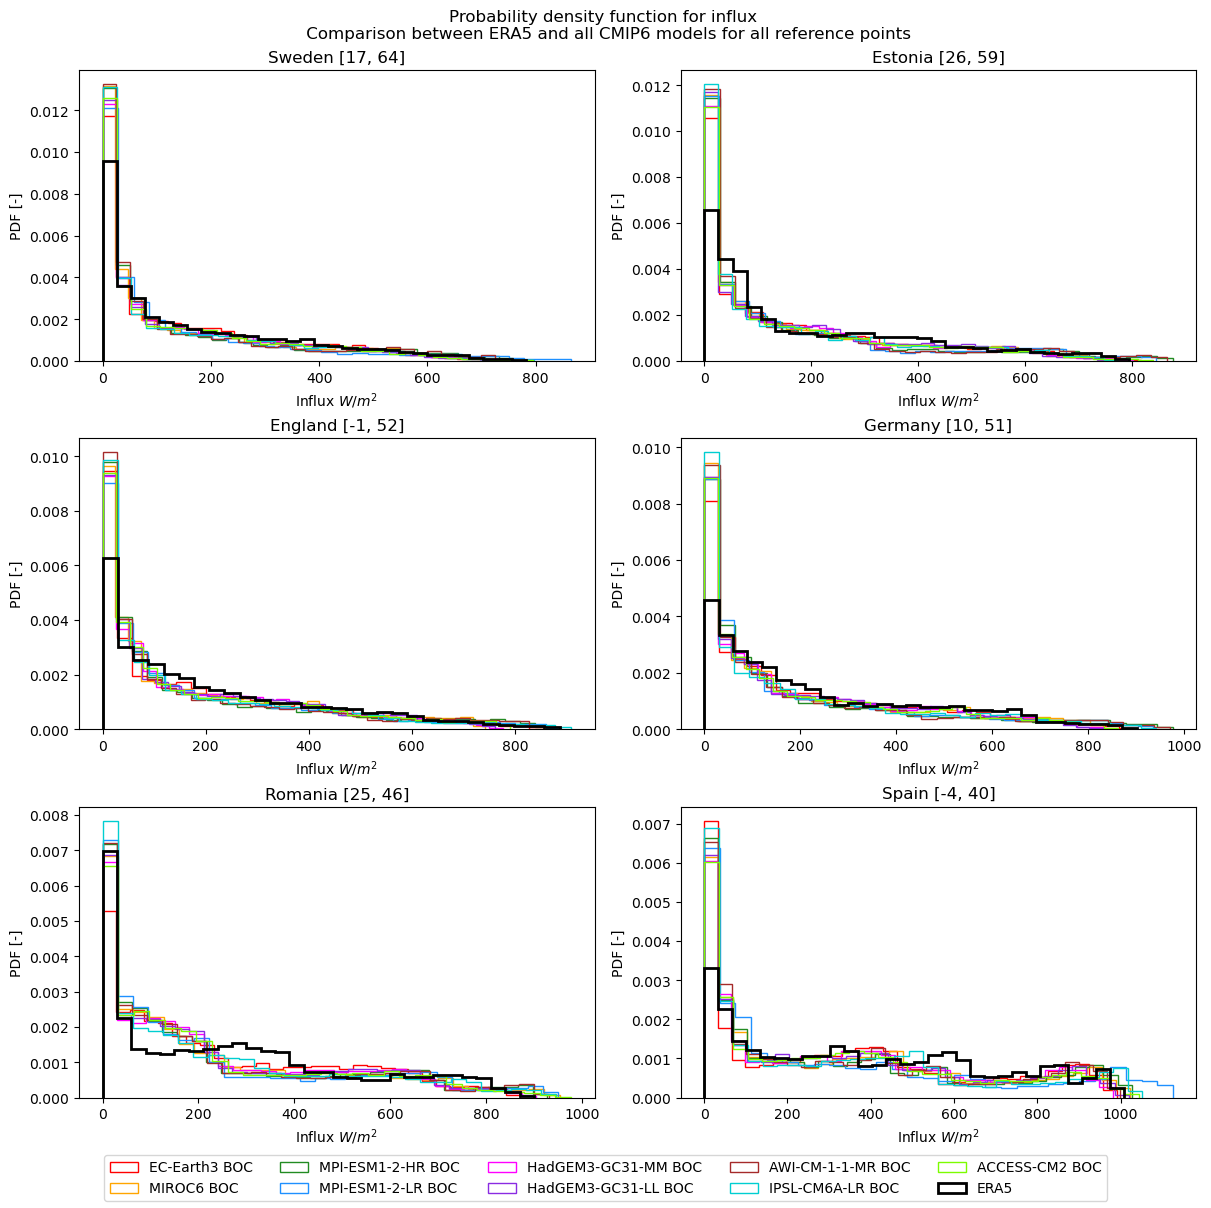

In [27]:
### All CMIP6 models compared to ERA5 for all reference locations for PV

### PV ########
variable = "influx"
CMIP6_models = CMIP6_models_solar
bins = 30


point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

# Intraanual variability for specific points in 1 plot:
legend_mod = False;
ssp_variant = 'ssp585'
fig,axs = plt.subplots(3,2,figsize=(12,12),layout='constrained')
title = f'Probability density function for influx \n Comparison between ERA5 and all CMIP6 models for all reference points'
fig.suptitle(title)

legend = []
for ii in range(6):
    point_name = f'point_{ii+1}';
    point = locals()[point_name];
    country_name = ref_country[ii]
   
    # data_df['mean'].plot(ax=axs.flat[ii],linewidth=3,legend=legend_mod,label=f'GWA-corrected ERA5 (reference)', color='black')
    # Monthly_mean['ERA5'] = data_df['mean']
        
    for CMIP6_model in CMIP6_models:
        plotcolor = model_colors.loc[CMIP6_model]['Color']
        if ii == 0: 
            legend.append(f"{CMIP6_model} BOC")
        CMIP6_model =CMIP6_model.replace('-','_')
        axs.flat[ii].hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_influx"].sel(x=point[0],y=point[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-')
    
    axs.flat[ii].hist(Europe_era5_15_22_influx_3hr.sel(x=point[0],y=point[1]),bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'],linewidth = 2)
    
    if ii == 0: legend.append(f"ERA5")
    
    # axs.flat[ii].legend(legend)
    axs.flat[ii].set_ylabel('PDF [-]')
    axs.flat[ii].set(xlabel='Influx $W/m^2$')
    axs.flat[ii].set_title(f'{country_name} [{point[0]}, {point[1]}]')

fig.legend(legend,ncols=5,loc='outside lower center')

## PDF - EC-Earth3 method 2 vs method 3
Here, the comparison of PDF for wind speed at hub height calculated using method 2 and 3 is conducted. 

method 2: 0.317 - method 3: 0.264
method 2: 0.39 - method 3: 0.062
method 2: 0.621 - method 3: 0.181
method 2: 0.318 - method 3: 0.101
method 2: 0.299 - method 3: 0.139
method 2: 0.409 - method 3: 0.144


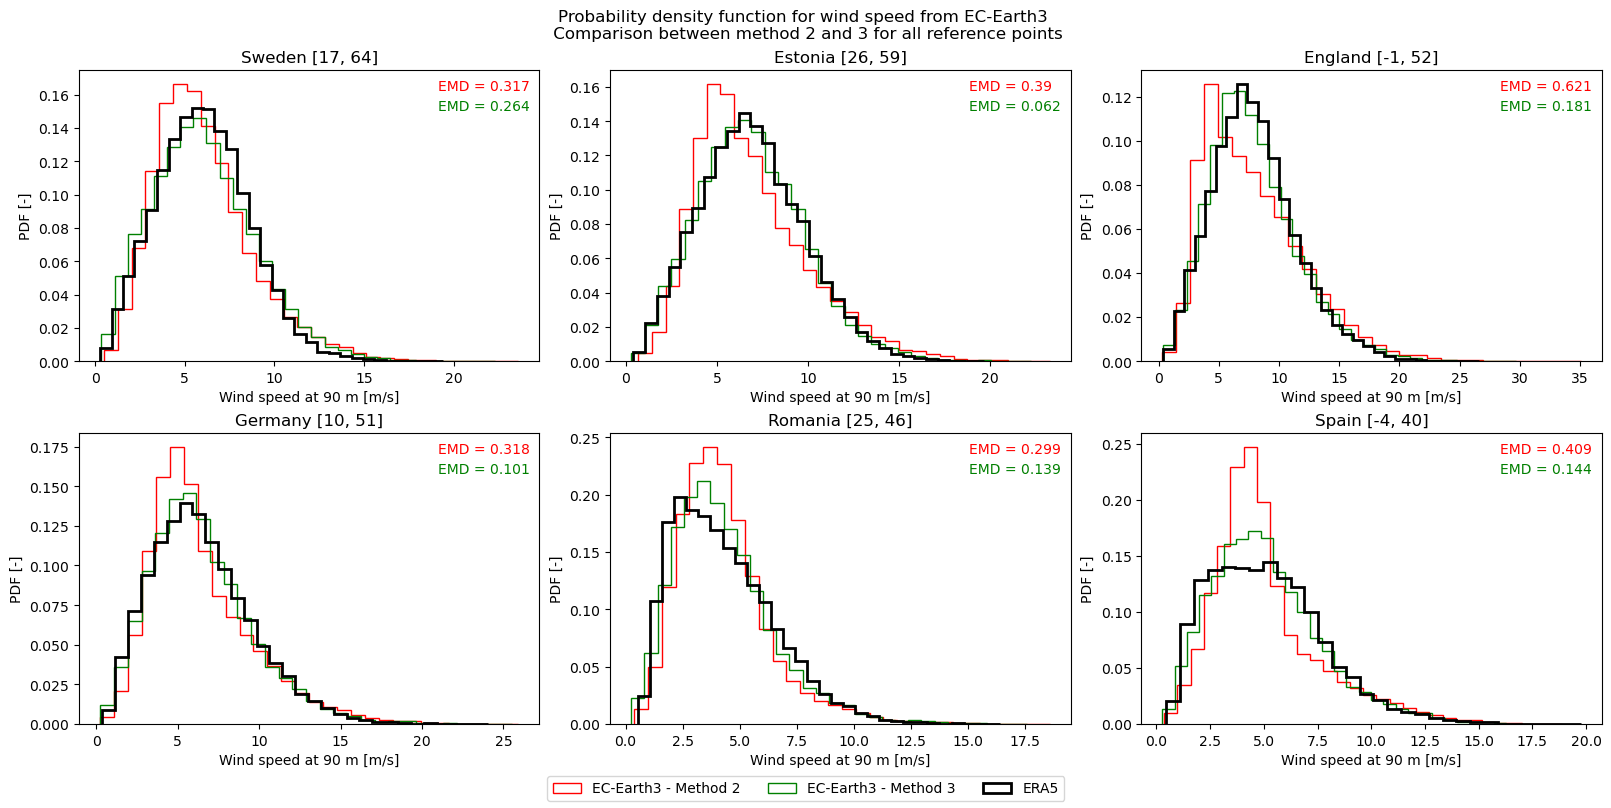

In [21]:
### WND90M ########
variable = "wnd90m"
CMIP6_models = ['EC-Earth3']
bins = 30

point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

# Intraanual variability for specific points in 1 plot:
legend_mod = False;
ssp_variant = 'ssp585'
fig,axs = plt.subplots(2,3,figsize=(16,8),layout='constrained')
title = f'Probability density function for wind speed from EC-Earth3 \n Comparison between method 2 and 3 for all reference points'
fig.suptitle(title)

for ii in range(6):
    legend = []
    point_name = f'point_{ii+1}';
    point = locals()[point_name];
    country_name = ref_country[ii]
   
    # data_df['mean'].plot(ax=axs.flat[ii],linewidth=3,legend=legend_mod,label=f'GWA-corrected ERA5 (reference)', color='black')
    # Monthly_mean['ERA5'] = data_df['mean']
    
    wnd_method2 = locals()[f"Corrected_Europe_EC_Earth3_ssp585_15_22_wnd90m"].sel(x=point[0],y=point[1])
    wnd_method3 = locals()[f"Europe_EC_Earth3_ssp585_15_22_wnd90m_power_law_GWA_corrected_no_indicator_matrix"].sel(x=point[0],y=point[1])
    wnd_era5 = Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=point[0],y=point[1])
    
    axs.flat[ii].hist(wnd_method2,bins=bins,density=True,histtype=u'step',color= 'red',linestyle = '-')
    axs.flat[ii].hist(wnd_method3,bins=bins,density=True,histtype=u'step',color= 'green',linestyle = '-')
    axs.flat[ii].hist(wnd_era5,bins=bins,density=True,histtype=u'step',color='black',label='ERA5',linewidth=2)

    EMD_method2 = round(emd_samples(wnd_era5,wnd_method2,bins=bins),3)
    EMD_method3 = round(emd_samples(wnd_era5,wnd_method3,bins=bins),3)

    axs.flat[ii].text(0.78,0.97,f"EMD = {EMD_method2}",ha='left',va='top',transform=axs.flat[ii].transAxes,color='red')
    axs.flat[ii].text(0.78,0.9,f"EMD = {EMD_method3}",ha='left',va='top',transform=axs.flat[ii].transAxes,color='green')

    
    print(f"method 2: {EMD_method2} - method 3: {EMD_method3}")

    # EMD_PDF_wnd90m_30bins[grid_info][CMIP6_model.replace('_','-')] = emd_samples(wnd90m_era5,wnd90m_cmip,bins=bins)
    # (n_CMIP,bins_CMIP,patches_CMIP) 

    # axs.flat[ii].legend(legend)
    axs.flat[ii].set_ylabel('PDF [-]')
    axs.flat[ii].set(xlabel='Wind speed at 90 m [m/s]')
    axs.flat[ii].set_title(f'{country_name} [{point[0]}, {point[1]}]')

fig.legend([f"EC-Earth3 - Method 2",f"EC-Earth3 - Method 3",'ERA5'],ncols=3,loc='outside lower center')

In [38]:
# Save plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/BOC/PDF/PDF_{variable}_EC_Earth3_meth2_vs_meth3_all_refpoints.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/BOC/PDF/PDF_wnd90m_EC_Earth3_meth2_vs_meth3_all_refpoints.png'

## PDF - BOC VS EOC
Here, the BOC is compared to the EOC

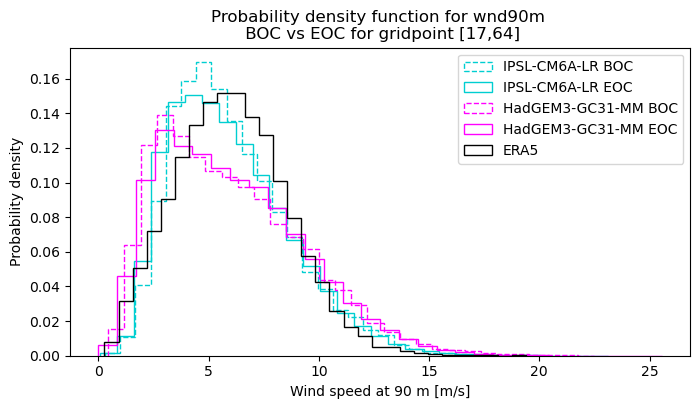

In [22]:
### WND90M ########
grid_coords = [17,64]
variable = "wnd90m"
CMIP6_models = ['IPSL-CM6A-LR','HadGEM3-GC31-MM']
# CMIP6_models = CMIP6_models_wind

# yy_start = 15
# yy_end = 22
bins = 30


fig,ax = plt.subplots(figsize=(8,4))
legend = []
for CMIP6_model in CMIP6_models:
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    legend.append(f"{CMIP6_model} BOC")
    legend.append(f"{CMIP6_model} EOC")
    CMIP6_model =CMIP6_model.replace('-','_')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_wnd90m"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '--')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_wnd90m"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-')

# ERA5
ax.hist(Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'])
legend.append(f"ERA5")
    
ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('Probability density')
ax.set_title(f"Probability density function for {variable} \n BOC vs EOC for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.legend(legend)

In [23]:
point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

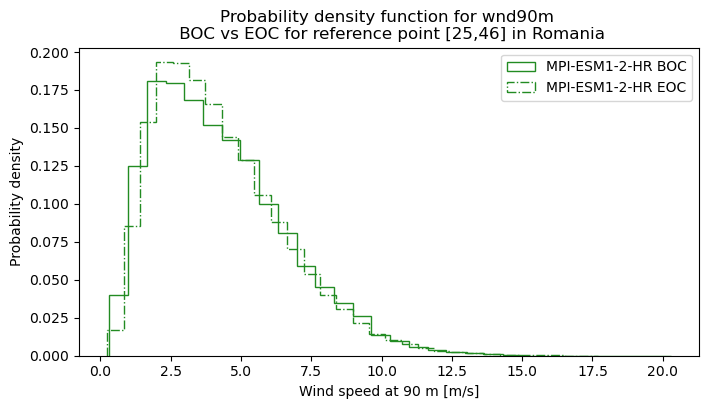

In [24]:
### Creating a comparison for each model in each of the six reference locations
### WND90M ########
i = 5
grid_coords = locals()[f"point_{i}"]
country = ref_country[i-1]
variable = "wnd90m"
CMIP6_models = ['MPI-ESM1-2-HR']
# CMIP6_models = [CMIP6_models_wind[8]]
bins = 30

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"


fig,ax = plt.subplots(figsize=(8,4))
legend = []
for CMIP6_model in CMIP6_models:
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    legend.append(f"{CMIP6_model} BOC")
    legend.append(f"{CMIP6_model} EOC")
    CMIP6_model =CMIP6_model.replace('-','_')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_wnd90m"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_wnd90m"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-.')
    
ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('Probability density')
ax.set_title(f"Probability density function for {variable} \n BOC vs EOC for reference point [{grid_coords[0]},{grid_coords[1]}] in {country}")
ax.legend(legend)


In [28]:
# Save the plot above?
# filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/EOC/PDF/PDF_{variable}_all_models_{grid_info}.png"
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/EOC/PDF/wnd90m/PDF_{variable}_{CMIP6_models[0].replace('-','_')}_{grid_info}.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/EOC/PDF/wnd90m/PDF_wnd90m_MPI_ESM1_2_HR_x25_y46.png'

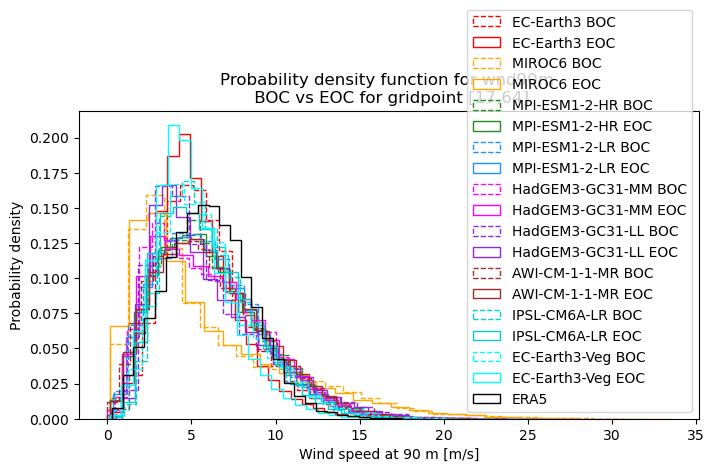

In [25]:
#### Comparison for ALL models, where ERA5 is also shown - not to use in report, just to see
### WND90M ########
grid_coords = [17,64]
variable = "wnd90m"
# CMIP6_models = ['IPSL-CM6A-LR','HadGEM3-GC31-MM']
CMIP6_models = CMIP6_models_wind

# yy_start = 15
# yy_end = 22
bins = 30


fig,ax = plt.subplots(figsize=(8,4))
legend = []
for CMIP6_model in CMIP6_models:
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    legend.append(f"{CMIP6_model} BOC")
    legend.append(f"{CMIP6_model} EOC")
    CMIP6_model =CMIP6_model.replace('-','_')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_wnd90m"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '--')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_wnd90m"].sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-')

# ERA5
ax.hist(Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'])
legend.append(f"ERA5")
    
ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('Probability density')
ax.set_title(f"Probability density function for {variable} \n BOC vs EOC for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.legend(legend)

In [28]:
point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

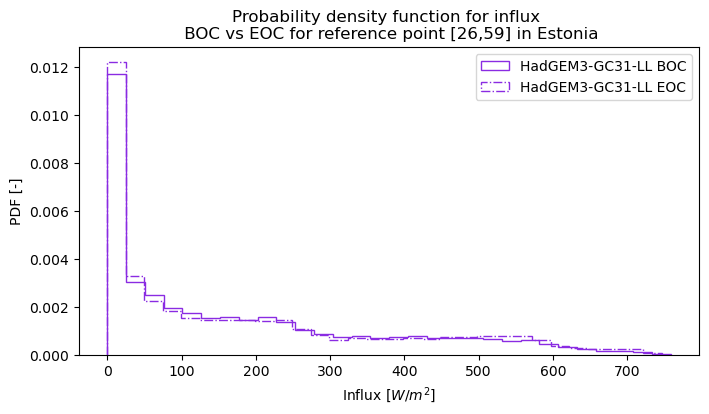

In [29]:
### WND90M ########
i = 2
grid_coords = locals()[f"point_{i}"]
country = ref_country[i-1]

variable = "influx"
CMIP6_models = ['HadGEM3-GC31-LL']
# CMIP6_models = [CMIP6_models_solar[8]]
bins = 30

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"

fig,ax = plt.subplots(figsize=(8,4))
legend = []
for CMIP6_model in CMIP6_models:
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    legend.append(f"{CMIP6_model} BOC")
    legend.append(f"{CMIP6_model} EOC")
    CMIP6_model =CMIP6_model.replace('-','_')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_influx"].sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time"),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-')
    ax.hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_influx"].sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time"),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-.')

# # ERA5
# ax.hist(Europe_era5_15_22_influx_3hr.sel(x=grid_coords[0],y=grid_coords[1]),bins=bins,density=True,histtype=u'step',color= model_colors.loc['era5']['Color'])
# legend.append(f"ERA5")
    
ax.set_xlabel('Influx $[W/m^2]$')
ax.set_ylabel('PDF [-]')
ax.set_title(f"Probability density function for {variable} \n BOC vs EOC for reference point [{grid_coords[0]},{grid_coords[1]}] in {country}")
ax.legend(legend)

In [43]:
# Save the plot above?
# filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/EOC/PDF/PDF_{variable}_all_models_{grid_info}.png"
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/EOC/PDF/influx/PDF_{variable}_{CMIP6_models[0].replace('-','_')}_{grid_info}.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/EOC/PDF/influx/PDF_influx_HadGEM3_GC31_LL_x26_y59.png'

### PDF for one model for each point

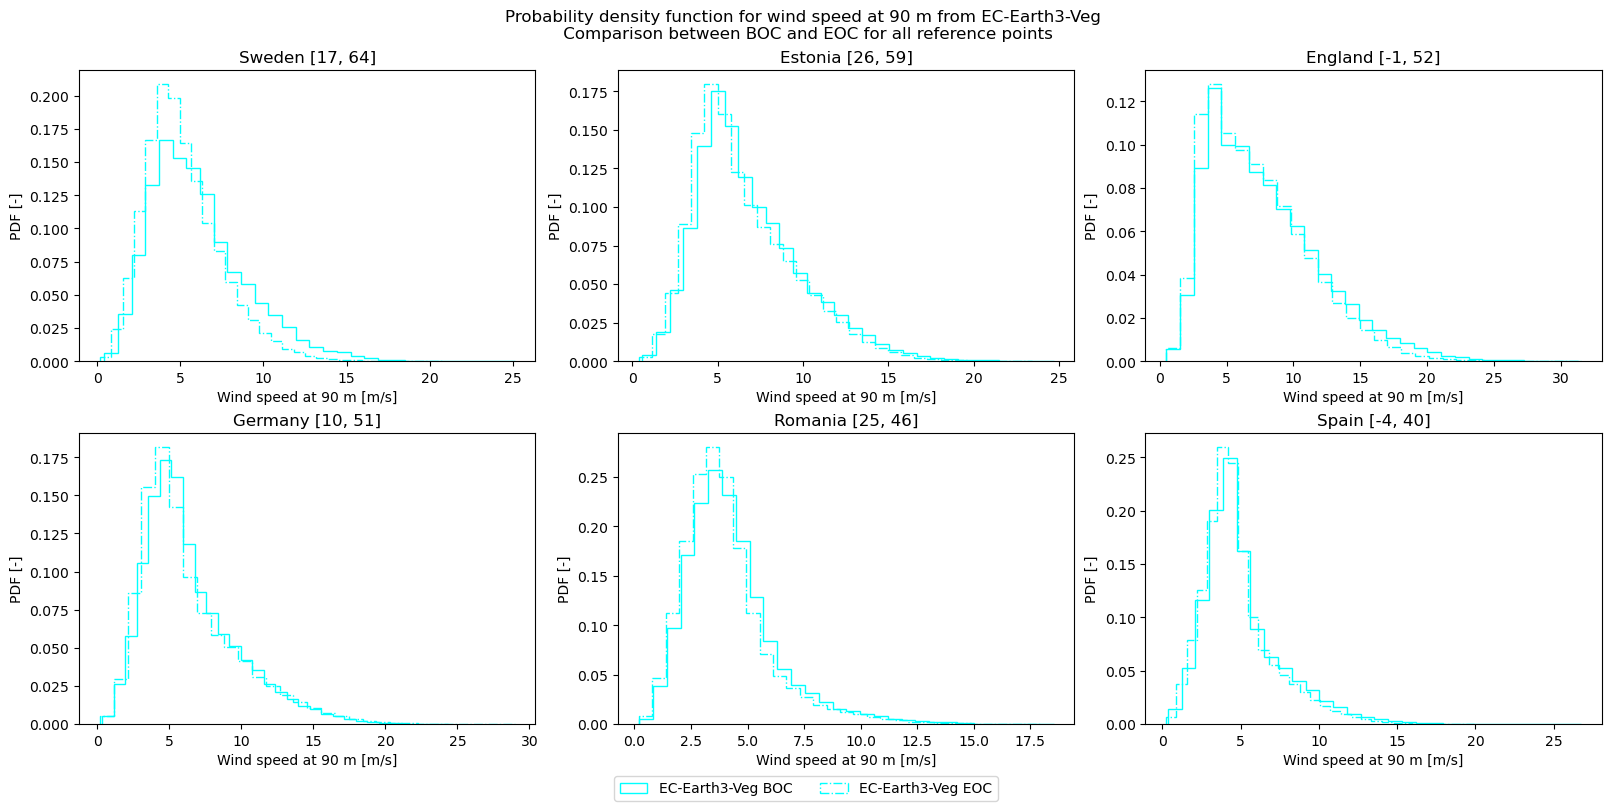

In [30]:
### WND90M ########
variable = "wnd90m"
CMIP6_models = [CMIP6_models_wind[8]]
bins = 30

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"

point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

# Intraanual variability for specific points in 1 plot:
legend_mod = False;
ssp_variant = 'ssp585'
fig,axs = plt.subplots(2,3,figsize=(16,8),layout='constrained')
title = f'Probability density function for wind speed at 90 m from {CMIP6_models[0]} \n Comparison between BOC and EOC for all reference points'
fig.suptitle(title)

for ii in range(6):
    legend = []
    point_name = f'point_{ii+1}';
    point = locals()[point_name];
    country_name = ref_country[ii]
   
    # data_df['mean'].plot(ax=axs.flat[ii],linewidth=3,legend=legend_mod,label=f'GWA-corrected ERA5 (reference)', color='black')
    # Monthly_mean['ERA5'] = data_df['mean']
        
    for CMIP6_model in CMIP6_models:
        plotcolor = model_colors.loc[CMIP6_model]['Color']
        legend.append(f"{CMIP6_model} BOC")
        legend.append(f"{CMIP6_model} EOC")
        CMIP6_model =CMIP6_model.replace('-','_')
        axs.flat[ii].hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_wnd90m"].sel(x=point[0],y=point[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-')
        axs.flat[ii].hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_wnd90m"].sel(x=point[0],y=point[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-.')
    
    # axs.flat[ii].legend(legend)
    axs.flat[ii].set_ylabel('PDF [-]')
    axs.flat[ii].set(xlabel='Wind speed at 90 m [m/s]')
    axs.flat[ii].set_title(f'{country_name} [{point[0]}, {point[1]}]')

fig.legend([f"{CMIP6_models[0]} BOC",f"{CMIP6_models[0]} EOC"],ncols=2,loc='outside lower center')

In [150]:
# Save plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/EOC/PDF/wnd90m/BOCvsEOC_all_points/PDF_{variable}_{CMIP6_models[0].replace('-','_')}_all_refpoints.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/EOC/PDF/wnd90m/BOCvsEOC_all_points/PDF_wnd90m_EC_Earth3_Veg_all_refpoints.png'

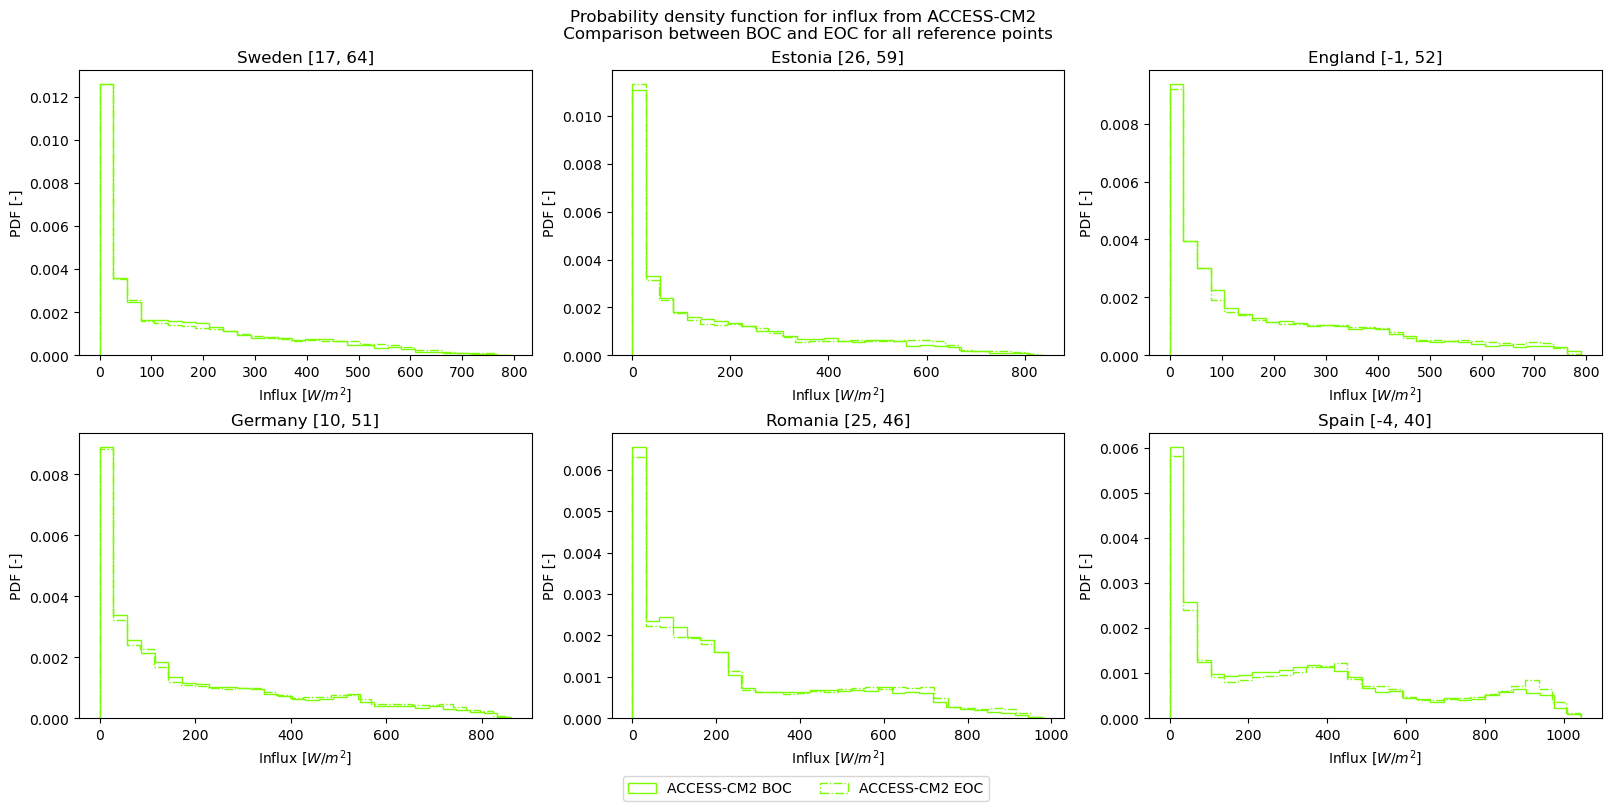

In [31]:
### INFLUX ########
variable = "influx"
CMIP6_models = [CMIP6_models_solar[8]]
bins = 30

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"

point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

# Intraanual variability for specific points in 1 plot:
legend_mod = False;
ssp_variant = 'ssp585'
fig,axs = plt.subplots(2,3,figsize=(16,8),layout='constrained')
title = f'Probability density function for influx from {CMIP6_models[0]} \n Comparison between BOC and EOC for all reference points'
fig.suptitle(title)

for ii in range(6):
    legend = []
    point_name = f'point_{ii+1}';
    point = locals()[point_name];
    country_name = ref_country[ii]
   
    # data_df['mean'].plot(ax=axs.flat[ii],linewidth=3,legend=legend_mod,label=f'GWA-corrected ERA5 (reference)', color='black')
    # Monthly_mean['ERA5'] = data_df['mean']
        
    for CMIP6_model in CMIP6_models:
        plotcolor = model_colors.loc[CMIP6_model]['Color']
        legend.append(f"{CMIP6_model} BOC")
        legend.append(f"{CMIP6_model} EOC")
        CMIP6_model =CMIP6_model.replace('-','_')
        axs.flat[ii].hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_influx"].sel(x=point[0],y=point[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-')
        axs.flat[ii].hist(locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_influx"].sel(x=point[0],y=point[1]),bins=bins,density=True,histtype=u'step',color= plotcolor,linestyle = '-.')
    
    # axs.flat[ii].legend(legend)
    axs.flat[ii].set_ylabel('PDF [-]')
    axs.flat[ii].set(xlabel='Influx $[W/m^2]$')
    axs.flat[ii].set_title(f'{country_name} [{point[0]}, {point[1]}]')

fig.legend([f"{CMIP6_models[0]} BOC",f"{CMIP6_models[0]} EOC"],ncols=2,loc='outside lower center')

In [169]:
# Save plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/EOC/PDF/influx/BOCvsEOC_all_points/PDF_{variable}_{CMIP6_models[0].replace('-','_')}_all_refpoints.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/EOC/PDF/influx/BOCvsEOC_all_points/PDF_influx_ACCESS_CM2_all_refpoints.png'

## CDF
Moving on to cumulative distribution function

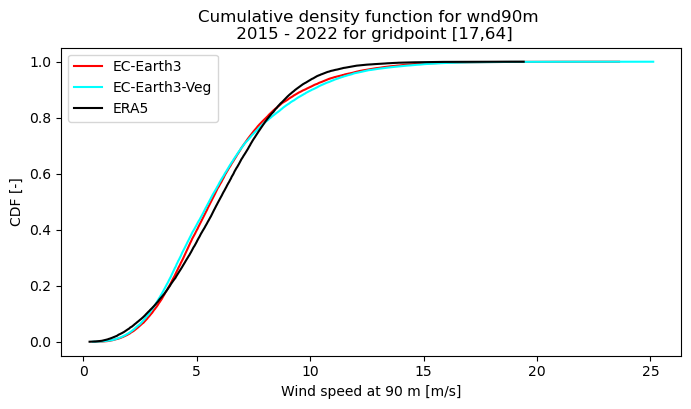

In [34]:
### Plotting CDF of wnd90m in BOC compared to ERA5
grid_coords = [17,64]
variable = "wnd90m"
CMIP6_models = ['EC-Earth3','EC-Earth3-Veg']

yy_start = 15
yy_end = 22

####
fig,ax = plt.subplots(figsize=(8,4))
legend = []

for CMIP6_model in CMIP6_models:
    # Sort the data
    legend.append(f"{CMIP6_model}")
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    CMIP6_model=CMIP6_model.replace('-','_')
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_{yy_start}_{yy_end}_{variable}"].sel(x=grid_coords[0],y=grid_coords[1])
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p,c=plotcolor)

# ERA5 - Sort the data
legend.append(f"ERA5")
data = Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=grid_coords[0],y=grid_coords[1])
data_sorted = np.sort(data)
p = 1. * np.arange(len(data)) / (len(data) - 1)
ax.plot(data_sorted, p,c = model_colors.loc['era5']['Color'])

ax.set_title(f"Cumulative density function for {variable} \n 20{yy_start} - 20{yy_end} for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('CDF [-]')
ax.legend(legend)
    

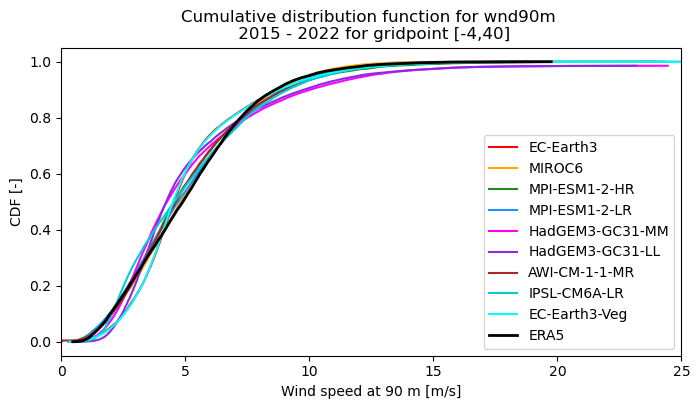

In [35]:
### Plotting CDF of wnd90m for all models compared to ERA5
grid_coords = [-4,40]
variable = "wnd90m"
CMIP6_models = CMIP6_models_wind

yy_start = 15
yy_end = 22

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"

####
fig,ax = plt.subplots(figsize=(8,4))
legend = []

for CMIP6_model in CMIP6_models:
    # Sort the data
    legend.append(f"{CMIP6_model}")
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    CMIP6_model=CMIP6_model.replace('-','_')
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_{yy_start}_{yy_end}_{variable}"].sel(x=grid_coords[0],y=grid_coords[1])
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p,c=plotcolor)

# ERA5 - Sort the data
legend.append(f"ERA5")
data = Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=grid_coords[0],y=grid_coords[1])
data_sorted = np.sort(data)
p = 1. * np.arange(len(data)) / (len(data) - 1)
ax.plot(data_sorted, p,c = model_colors.loc['era5']['Color'],linewidth=2)

ax.set_title(f"Cumulative distribution function for {variable} \n 20{yy_start} - 20{yy_end} for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('CDF [-]')
ax.set_xlim([0, 25])
ax.legend(legend)
    

In [351]:
# Save the plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/BOC/CDF/CDF_{variable}_all_models_{grid_info}.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/BOC/CDF/CDF_wnd90m_all_models_xneg4_y40.png'

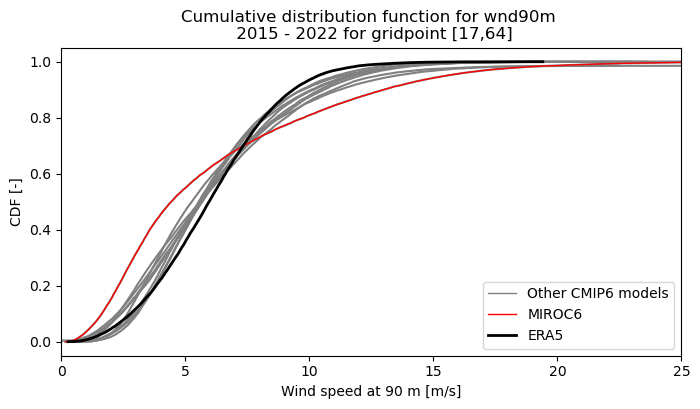

In [36]:
### Plotting CDF of wnd90m - Focus on MIROC6 
grid_coords = [17,64]
variable = "wnd90m"
CMIP6_models = CMIP6_models_wind

yy_start = 15
yy_end = 22

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"

####
fig,ax = plt.subplots(figsize=(8,4))
legend = []

for CMIP6_model in CMIP6_models:
    # Sort the data
    plotcolor = 'gray'
    CMIP6_model=CMIP6_model.replace('-','_')
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_{yy_start}_{yy_end}_{variable}"].sel(x=grid_coords[0],y=grid_coords[1])
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p,c=plotcolor)

data = Corrected_Europe_EC_Earth3_ssp585_15_22_wnd90m.sel(x=grid_coords[0],y=grid_coords[1])
data_sorted = np.sort(data)
p = 1. * np.arange(len(data)) / (len(data) - 1)
ax.plot(data_sorted, p,c = 'gray',linewidth=1,label = 'Other CMIP6 models')

# MIROC6
data = Corrected_Europe_MIROC6_ssp585_15_22_wnd90m.sel(x=grid_coords[0],y=grid_coords[1])
data_sorted = np.sort(data)
p = 1. * np.arange(len(data)) / (len(data) - 1)
ax.plot(data_sorted, p,c = 'red',linewidth=1,label = 'MIROC6')

# ERA5 - Sort the data
data = Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=grid_coords[0],y=grid_coords[1])
data_sorted = np.sort(data)
p = 1. * np.arange(len(data)) / (len(data) - 1)
ax.plot(data_sorted, p,c = model_colors.loc['era5']['Color'],linewidth=2,label ='ERA5')

ax.set_title(f"Cumulative distribution function for {variable} \n 20{yy_start} - 20{yy_end} for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('CDF [-]')
ax.set_xlim([0, 25])
ax.legend()
    

In [339]:
# Save the plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/BOC/CDF/CDF_{variable}_MIROC6bad_{grid_info}.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/BOC/CDF/CDF_wnd90m_MIROC6bad_x17_y64.png'

### BOC - CDF for solar

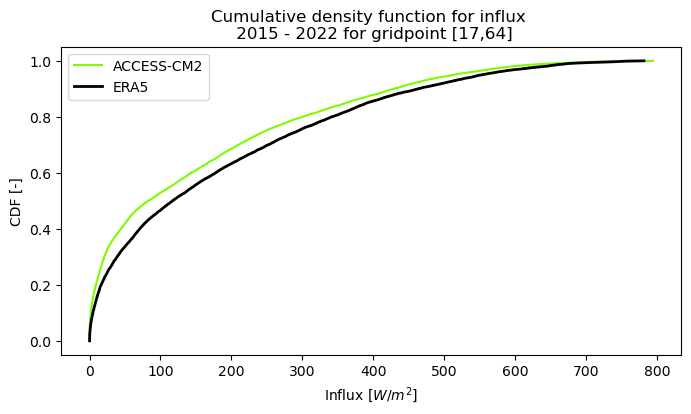

In [37]:
### Plotting CDF for solar in the BOC
grid_coords = [17,64]
variable = "influx"
CMIP6_models = ['ACCESS-CM2']

yy_start = 15
yy_end = 22

####
fig,ax = plt.subplots(figsize=(8,4))
legend = []

for CMIP6_model in CMIP6_models:
    # Sort the data
    legend.append(f"{CMIP6_model}")
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    CMIP6_model=CMIP6_model.replace('-','_')
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_{yy_start}_{yy_end}_{variable}"].sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how='any')
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p,c=plotcolor)

# ERA5 - Sort the data
legend.append(f"ERA5")
data = Europe_era5_15_22_influx_3hr.sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how='any')
data_sorted = np.sort(data)
p = 1. * np.arange(len(data)) / (len(data) - 1)
ax.plot(data_sorted, p,c = model_colors.loc['era5']['Color'],linewidth=2)

ax.set_title(f"Cumulative density function for {variable} \n 20{yy_start} - 20{yy_end} for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.set_xlabel('Influx $[W/m^2]$')
ax.set_ylabel('CDF [-]')
ax.legend(legend)
    

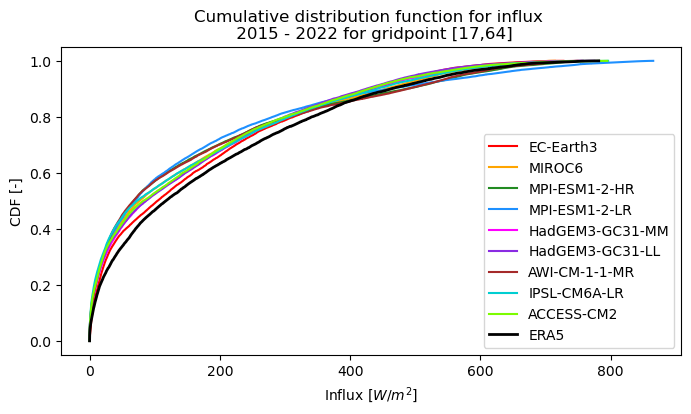

In [38]:
### Plotting CDF for solar - for all CMIP6 models compared to ERA5
grid_coords = [17,64]
variable = "influx"
CMIP6_models = CMIP6_models_solar

yy_start = 15
yy_end = 22

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"

####
fig,ax = plt.subplots(figsize=(8,4))
legend = []

for CMIP6_model in CMIP6_models:
    # Sort the data
    legend.append(f"{CMIP6_model}")
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    CMIP6_model=CMIP6_model.replace('-','_')
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_{yy_start}_{yy_end}_{variable}"].sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how='any')
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p,c=plotcolor)

# ERA5 - Sort the data
legend.append(f"ERA5")
data = Europe_era5_15_22_influx_3hr.sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how='any')
data_sorted = np.sort(data)
p = 1. * np.arange(len(data)) / (len(data) - 1)
ax.plot(data_sorted, p,c = model_colors.loc['era5']['Color'],linewidth=2)

ax.set_title(f"Cumulative distribution function for {variable} \n 20{yy_start} - 20{yy_end} for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.set_xlabel('Influx $[W/m^2]$')
ax.set_ylabel('CDF [-]')
ax.legend(legend)
    

In [363]:
# Save the plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/BOC/CDF/CDF_{variable}_all_models_{grid_info}.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/BOC/CDF/CDF_influx_all_models_x17_y64.png'

## CDF - BOC VS EOC

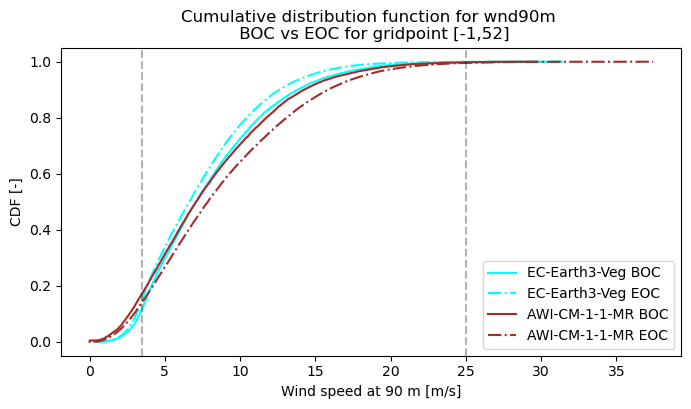

In [40]:
### Plotting CDF of wnd90m - BOC vs EOC
grid_coords = [-1,52]
variable = "wnd90m"
CMIP6_models = ['EC-Earth3-Veg','AWI-CM-1-1-MR']

yy_start = 15
yy_end = 22

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"


####
fig,ax = plt.subplots(figsize=(8,4))
legend = []

for CMIP6_model in CMIP6_models:
    # Sort the data
    legend.append(f"{CMIP6_model} BOC")
    legend.append(f"{CMIP6_model} EOC")
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    CMIP6_model=CMIP6_model.replace('-','_')
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_{variable}"].sel(x=grid_coords[0],y=grid_coords[1])
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p,c=plotcolor,linestyle='-')
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_{variable}"].sel(x=grid_coords[0],y=grid_coords[1])
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p,c=plotcolor,linestyle = '-.')

# # ERA5 - Sort the data
# legend.append(f"ERA5")
# data = Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=grid_coords[0],y=grid_coords[1])
# data_sorted = np.sort(data)
# p = 1. * np.arange(len(data)) / (len(data) - 1)
# ax.plot(data_sorted, p,c = model_colors.loc['era5']['Color'])

ax.axvline(x=3.5,color='black',linestyle='--',alpha=0.3)
ax.axvline(x=25,color='black',linestyle='--',alpha=0.3)

ax.set_title(f"Cumulative distribution function for {variable} \n BOC vs EOC for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('CDF [-]')
ax.legend(legend)


In [41]:
CMIP6_models_wind_no_MIROC  = ['EC-Earth3','MPI-ESM1-2-HR','MPI-ESM1-2-LR','HadGEM3-GC31-MM','HadGEM3-GC31-LL','AWI-CM-1-1-MR','IPSL-CM6A-LR','EC-Earth3-Veg'] #wind

Text(0, 0.5, 'CDF [-]')

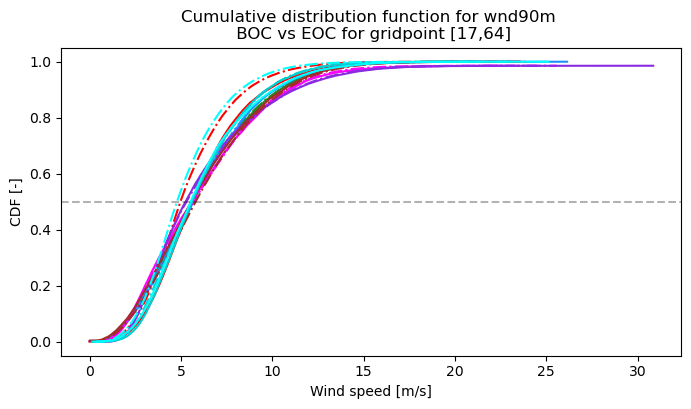

In [42]:
### Plotting CDF of wnd90m - BOC vs EOC
grid_coords = [17,64]
variable = "wnd90m"
CMIP6_models = CMIP6_models_wind_no_MIROC

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"



####
fig,ax = plt.subplots(figsize=(8,4))
legend = []

for CMIP6_model in CMIP6_models:
    # Sort the data
    legend.append(f"{CMIP6_model} BOC")
    legend.append(f"{CMIP6_model} EOC")
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    CMIP6_model=CMIP6_model.replace('-','_')
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_{variable}"].sel(x=grid_coords[0],y=grid_coords[1])
    data_sorted_CMIP_BOC = np.sort(data)
    # calculate the proportional values of samples
    p_CMIP_BOC = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted_CMIP_BOC, p_CMIP_BOC,c=plotcolor,linestyle='-')
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_{variable}"].sel(x=grid_coords[0],y=grid_coords[1])
    data_sorted_CMIP_EOC = np.sort(data)
    # calculate the proportional values of samples
    p_CMIP_EOC = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted_CMIP_EOC, p_CMIP_EOC,c=plotcolor,linestyle = '-.')
    

ax.axhline(y=0.5,color='black',linestyle='--',alpha=0.3)

ax.set_title(f"Cumulative distribution function for {variable} \n BOC vs EOC for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.set_xlabel('Wind speed [m/s]')
ax.set_ylabel('CDF [-]')
# ax.legend(legend)
    

### Influx

In [43]:
point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

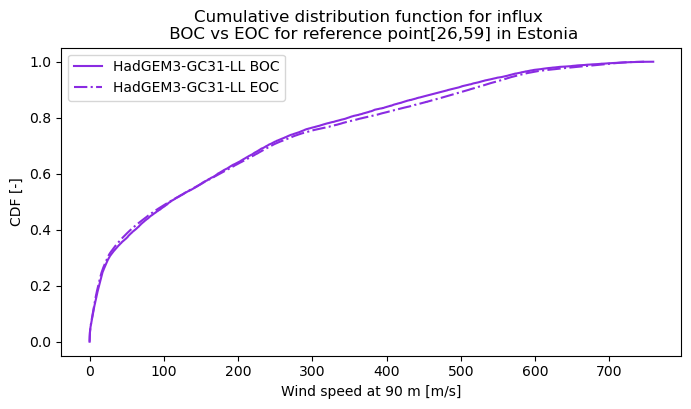

In [44]:
### Plotting CDF of influx - BOC vs EOC
i = 2
grid_coords = locals()[f"point_{i}"]
country = ref_country[i-1]
variable = "influx"
CMIP6_models = ['HadGEM3-GC31-LL']

yy_start = 15
yy_end = 22

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"


####
fig,ax = plt.subplots(figsize=(8,4))
legend = []

for CMIP6_model in CMIP6_models:
    # Sort the data
    legend.append(f"{CMIP6_model} BOC")
    legend.append(f"{CMIP6_model} EOC")
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    CMIP6_model=CMIP6_model.replace('-','_')
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_{variable}"].sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how='any')
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p,c=plotcolor,linestyle='-')
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_{variable}"].sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how='any')
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p,c=plotcolor,linestyle = '-.')


ax.set_title(f"Cumulative distribution function for {variable} \n BOC vs EOC for reference point[{grid_coords[0]},{grid_coords[1]}] in {country}")
ax.set_xlabel('Wind speed at 90 m [m/s]')
ax.set_ylabel('CDF [-]')
ax.legend(legend)

In [49]:
# Save the plot above?
# filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/EOC/PDF/PDF_{variable}_all_models_{grid_info}.png"
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/EOC/CDF/CDF_BOC_EOC_{variable}_{CMIP6_models[0].replace('-','_')}_{grid_info}.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/EOC/CDF/CDF_BOC_EOC_influx_HadGEM3_GC31_LL_x26_y59.png'

Text(0, 0.5, 'CDF [-]')

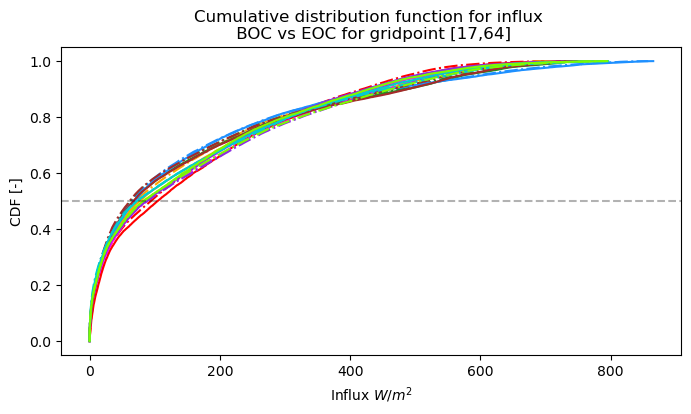

In [45]:
### Plotting CDF of wnd90m - BOC vs EOC
grid_coords = [17,64]
variable = "influx"
CMIP6_models = CMIP6_models_solar

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"

####
fig,ax = plt.subplots(figsize=(8,4))
legend = []

for CMIP6_model in CMIP6_models:
    # Sort the data
    legend.append(f"{CMIP6_model} BOC")
    legend.append(f"{CMIP6_model} EOC")
    plotcolor = model_colors.loc[CMIP6_model]['Color']
    CMIP6_model=CMIP6_model.replace('-','_')
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_{variable}"].sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how='any')
    data_sorted_CMIP_BOC = np.sort(data)
    # calculate the proportional values of samples
    p_CMIP_BOC = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted_CMIP_BOC, p_CMIP_BOC,c=plotcolor,linestyle='-')
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_{variable}"].sel(x=grid_coords[0],y=grid_coords[1]).dropna(dim="time",how='any')
    data_sorted_CMIP_EOC = np.sort(data)
    # calculate the proportional values of samples
    p_CMIP_EOC = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted_CMIP_EOC, p_CMIP_EOC,c=plotcolor,linestyle = '-.')

ax.axhline(y=0.5,color='black',linestyle='--',alpha=0.3)

ax.set_title(f"Cumulative distribution function for {variable} \n BOC vs EOC for gridpoint [{grid_coords[0]},{grid_coords[1]}]")
ax.set_xlabel('Influx $W/m^2$')
ax.set_ylabel('CDF [-]')
# ax.legend(legend)
    

## CDF - One model, all locations

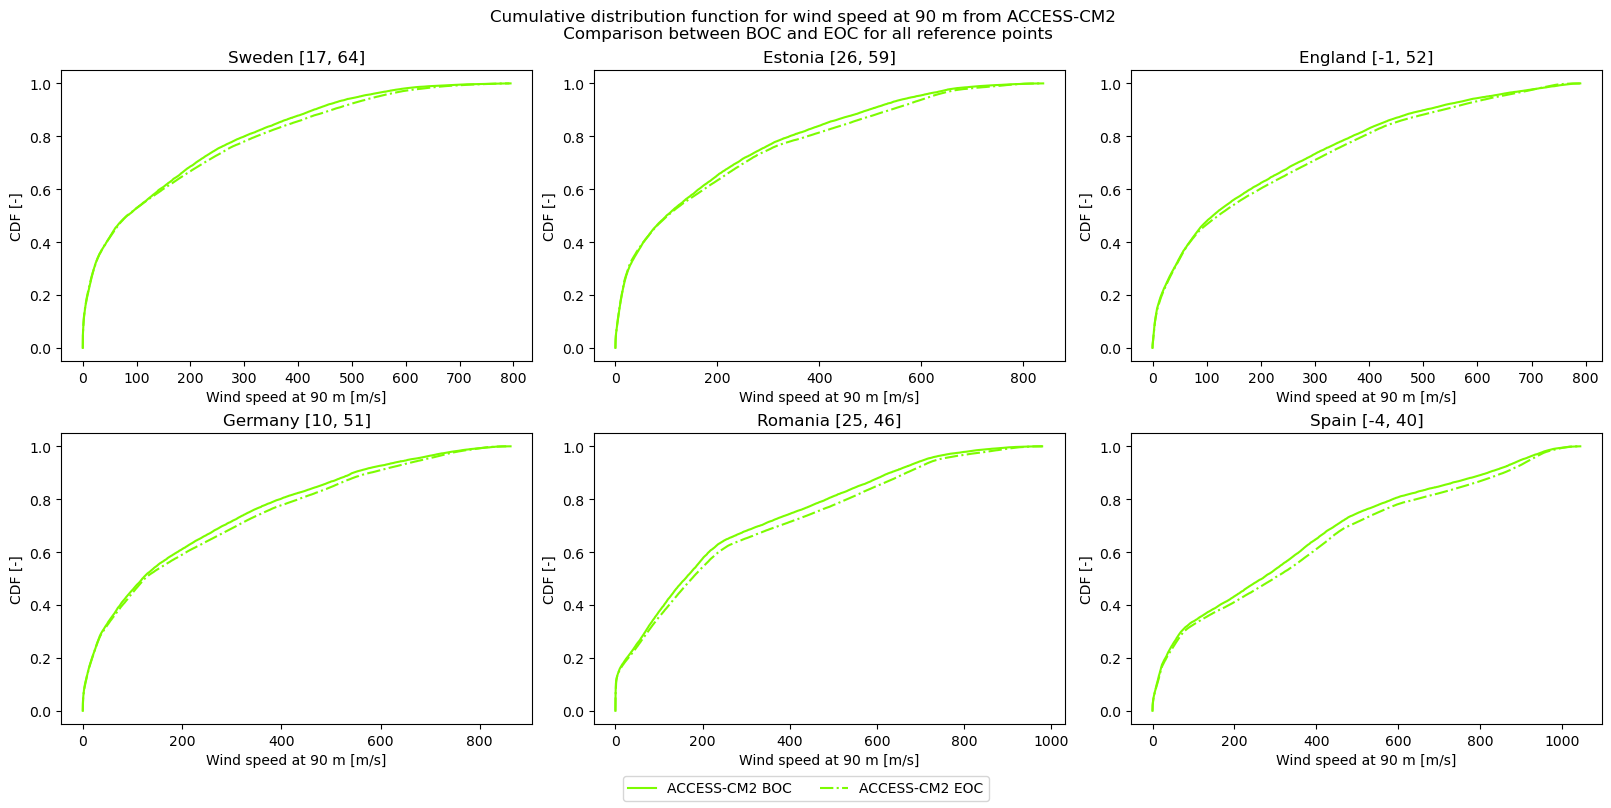

In [46]:
### WND90M ########
# variable = "wnd90m"
# CMIP6_model = CMIP6_models_wind[8]
variable = "influx"
CMIP6_model = CMIP6_models_solar[8]
bins = 30

point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

legend_mod = False;
ssp_variant = 'ssp585'
fig,axs = plt.subplots(2,3,figsize=(16,8),layout='constrained')
title = f'Cumulative distribution function for wind speed at 90 m from {CMIP6_model} \n Comparison between BOC and EOC for all reference points'
fig.suptitle(title)

for ii in range(6):
    legend = []
    point_name = f'point_{ii+1}';
    point = locals()[point_name];
    country_name = ref_country[ii]
    CMIP6_model =CMIP6_model.replace('-','_')
    plotcolor = model_colors.loc[CMIP6_model.replace('_','-')]['Color']

    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_{variable}"].sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data_sorted_CMIP_BOC = np.sort(data)
    # calculate the proportional values of samples
    p_CMIP_BOC = 1. * np.arange(len(data)) / (len(data) - 1)
    axs.flat[ii].plot(data_sorted_CMIP_BOC, p_CMIP_BOC,c=plotcolor,linestyle='-')
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_{variable}"].sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data_sorted_CMIP_EOC = np.sort(data)
    # calculate the proportional values of samples
    p_CMIP_EOC = 1. * np.arange(len(data)) / (len(data) - 1)
    axs.flat[ii].plot(data_sorted_CMIP_EOC, p_CMIP_EOC,c=plotcolor,linestyle = '-.')   
    
    # axs.flat[ii].legend(legend)
    axs.flat[ii].set_ylabel('CDF [-]')
    axs.flat[ii].set(xlabel='Wind speed at 90 m [m/s]')
    axs.flat[ii].set_title(f'{country_name} [{point[0]}, {point[1]}]')

fig.legend([f"{CMIP6_model.replace('_','-')} BOC",f"{CMIP6_model.replace('_','-')} EOC"],ncols=2,loc='outside lower center')

In [48]:
# Save plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/EOC/CDF/BOCvsEOC_all_points/CDF_{variable}_{CMIP6_model.replace('-','_')}_all_refpoints.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/EOC/CDF/BOCvsEOC_all_points/CDF_influx_ACCESS_CM2_all_refpoints.png'

## CDF for wind - percent change at cut-in and cutout
Investigating the change in CDF at cut-in and cutout speed
This needs rerunning for each model, so is commented out here - results are in appendix F

In [47]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [48]:
grid_infos = ['x17_y64','x26_y59','xneg1_y52','x10_y51','x25_y46','xneg4_y40']

# DataFrame to store EMD for PDF from each model at each point to the ERA5 value
wnd90m_CDF_at_cut_in_BOC = pd.DataFrame(np.zeros([len(grid_infos),len(CMIP6_models_wind)]),index=grid_infos,columns=CMIP6_models_wind)
wnd90m_CDF_at_cutout_BOC = pd.DataFrame(np.zeros([len(grid_infos),len(CMIP6_models_wind)]),index=grid_infos,columns=CMIP6_models_wind)
wnd90m_CDF_at_cut_in_EOC = pd.DataFrame(np.zeros([len(grid_infos),len(CMIP6_models_wind)]),index=grid_infos,columns=CMIP6_models_wind)
wnd90m_CDF_at_cutout_EOC = pd.DataFrame(np.zeros([len(grid_infos),len(CMIP6_models_wind)]),index=grid_infos,columns=CMIP6_models_wind)

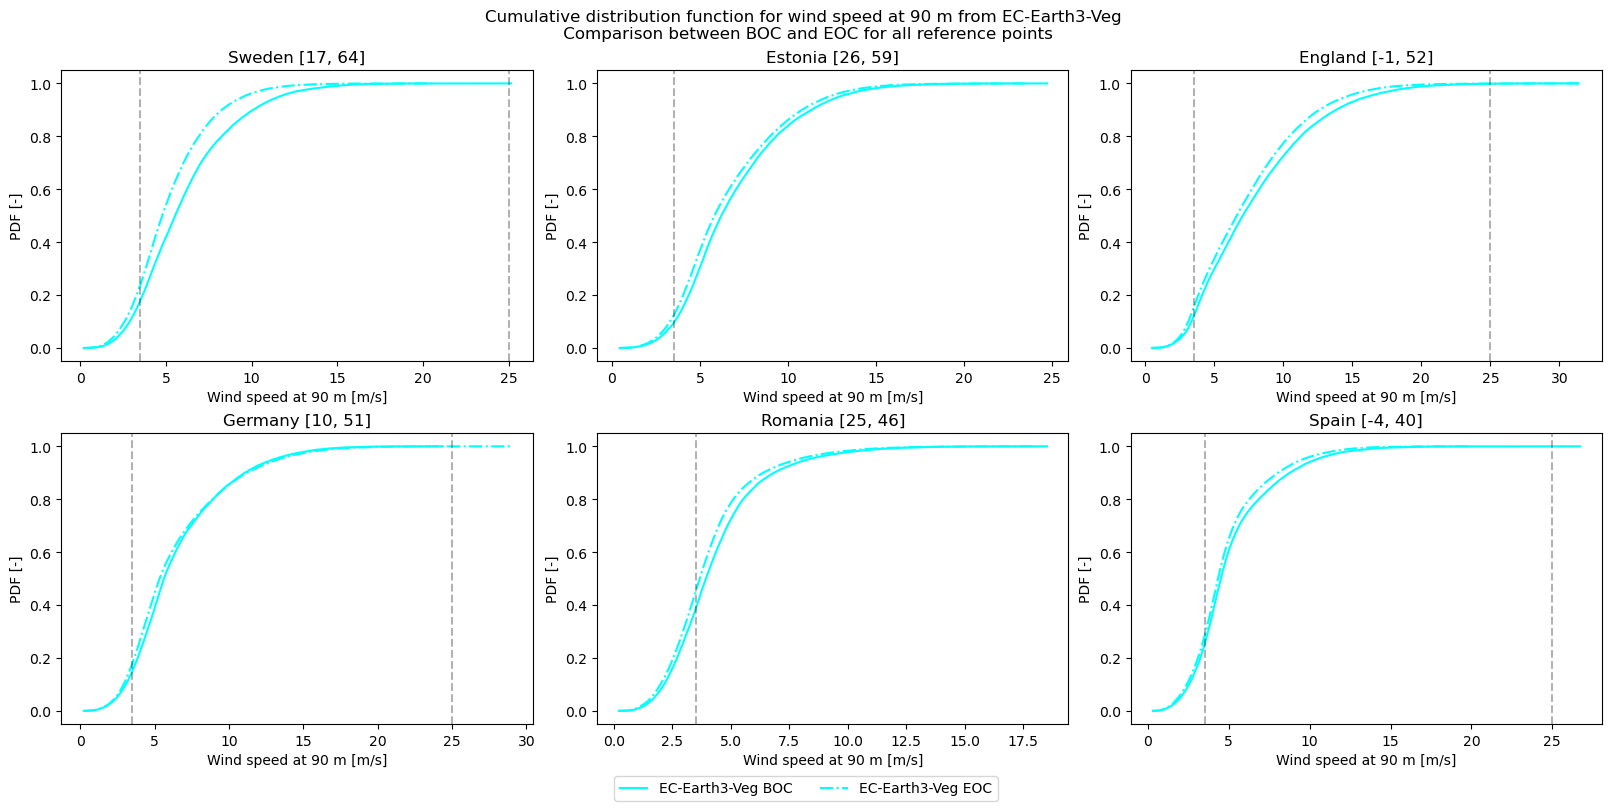

In [49]:
### WND90M ########
variable = "wnd90m"
CMIP6_model = CMIP6_models_wind[8]
bins = 30

point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

legend_mod = False;
ssp_variant = 'ssp585'
fig,axs = plt.subplots(2,3,figsize=(16,8),layout='constrained')
title = f'Cumulative distribution function for wind speed at 90 m from {CMIP6_model} \n Comparison between BOC and EOC for all reference points'
fig.suptitle(title)

for ii in range(6):
    legend = []
    point_name = f'point_{ii+1}';
    point = locals()[point_name];
    
    country_name = ref_country[ii]
    CMIP6_model =CMIP6_model.replace('-','_')
    plotcolor = model_colors.loc[CMIP6_model.replace('_','-')]['Color']

    #### BOC #####
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_{variable}"].sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data_sorted_CMIP_BOC = np.sort(data)
    # calculate the proportional values of samples
    p_CMIP_BOC = 1. * np.arange(len(data)) / (len(data) - 1)
    axs.flat[ii].plot(data_sorted_CMIP_BOC, p_CMIP_BOC,c=plotcolor,linestyle='-')
    max_BOC = max(data.values)
    (nearest_cut_in_BOC,cut_in_index_BOC) = find_nearest(data_sorted_CMIP_BOC,3.5) 
    (nearest_cutout_BOC,cutout_index_BOC) = find_nearest(data_sorted_CMIP_BOC,25)
    wnd90m_CDF_at_cut_in_BOC[CMIP6_model.replace('_','-')][ii] = p_CMIP_BOC[cut_in_index_BOC]
    wnd90m_CDF_at_cutout_BOC[CMIP6_model.replace('_','-')][ii] = p_CMIP_BOC[cutout_index_BOC]
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_{variable}"].sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data_sorted_CMIP_EOC = np.sort(data)
    # calculate the proportional values of samples
    p_CMIP_EOC = 1. * np.arange(len(data)) / (len(data) - 1)
    axs.flat[ii].plot(data_sorted_CMIP_EOC, p_CMIP_EOC,c=plotcolor,linestyle = '-.')   
    max_EOC = max(data.values)
    (nearest_cut_in_EOC,cut_in_index_EOC) = find_nearest(data_sorted_CMIP_EOC,3.5)
    (nearest_cutout_EOC,cutout_index_EOC) = find_nearest(data_sorted_CMIP_EOC,25)
    wnd90m_CDF_at_cut_in_EOC[CMIP6_model.replace('_','-')][ii] = p_CMIP_EOC[cut_in_index_EOC]
    wnd90m_CDF_at_cutout_EOC[CMIP6_model.replace('_','-')][ii] = p_CMIP_EOC[cutout_index_EOC]
    
    axs.flat[ii].axvline(x=3.5,color='black',linestyle='--',alpha=0.3)
    
    if max_EOC > 25 or max_BOC > 25: 
        axs.flat[ii].axvline(x=25,color='black',linestyle='--',alpha=0.3)
    
    # axs.flat[ii].legend(legend)
    axs.flat[ii].set_ylabel('PDF [-]')
    axs.flat[ii].set(xlabel='Wind speed at 90 m [m/s]')
    axs.flat[ii].set_title(f'{country_name} [{point[0]}, {point[1]}]')

fig.legend([f"{CMIP6_model.replace('_','-')} BOC",f"{CMIP6_model.replace('_','-')} EOC"],ncols=2,loc='outside lower center')

In [169]:
# ### Calculating difference between cut-in and cutout speed (EOC - BOC)/BOC
# wnd90m_CDF_at_cut_in_percent_change = pd.DataFrame(np.zeros([len(grid_infos),len(CMIP6_models_wind)]),index=grid_infos,columns=CMIP6_models_wind)
# wnd90m_CDF_at_cutout_percent_change = pd.DataFrame(np.zeros([len(grid_infos),len(CMIP6_models_wind)]),index=grid_infos,columns=CMIP6_models_wind)

In [195]:
# ### WND90M ########
# variable = "wnd90m"
# CMIP6_model = CMIP6_models_wind[0]


# for ii in range(6):
#     CDF_cut_in_BOC =  wnd90m_CDF_at_cut_in_BOC[CMIP6_model.replace('_','-')][ii] 
#     CDF_cutout_BOC =  wnd90m_CDF_at_cutout_BOC[CMIP6_model.replace('_','-')][ii] 

#     CDF_cut_in_EOC =  wnd90m_CDF_at_cut_in_EOC[CMIP6_model.replace('_','-')][ii] 
#     CDF_cutout_EOC =  wnd90m_CDF_at_cutout_EOC[CMIP6_model.replace('_','-')][ii] 
 
#     wnd90m_CDF_at_cut_in_percent_change[CMIP6_model.replace('_','-')][ii] = (CDF_cut_in_EOC-CDF_cut_in_BOC)/CDF_cut_in_BOC
#     wnd90m_CDF_at_cutout_percent_change[CMIP6_model.replace('_','-')][ii] = (CDF_cutout_EOC-CDF_cutout_BOC)/CDF_cutout_BOC

In [198]:
# wnd90m_CDF_at_cut_in_percent_change.to_excel(f"E://Master's/CDF/wnd90m_CDF_at_cut_in_percent_change.xlsx")

In [199]:
# wnd90m_CDF_at_cutout_percent_change.to_excel(f"E://Master's/CDF/wnd90m_CDF_at_cutout_percent_change.xlsx")

### CDF for influx

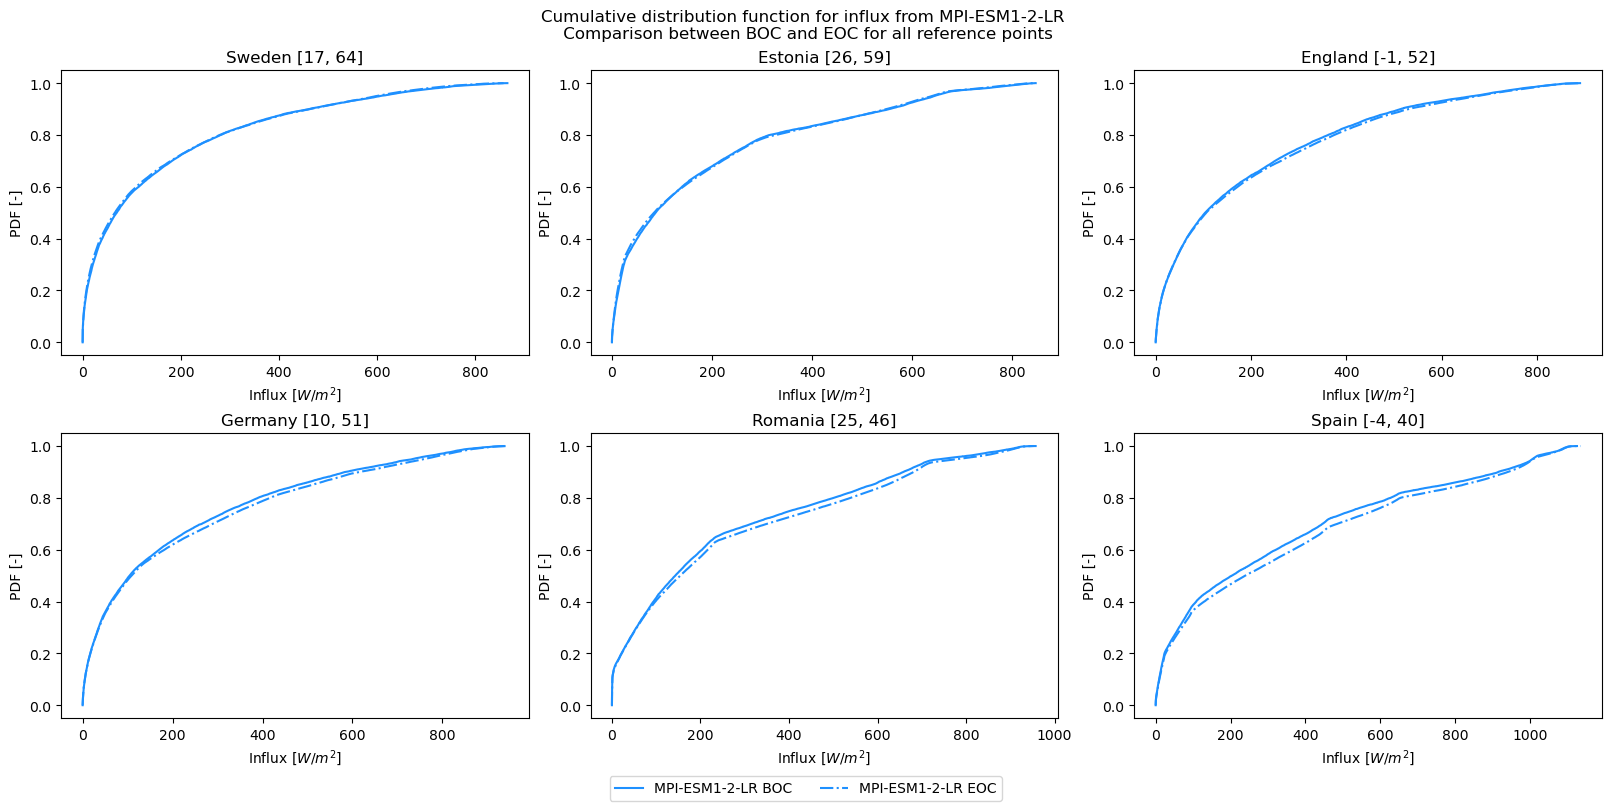

In [51]:
### INFLUX ########
variable = "influx"
CMIP6_model = CMIP6_models_solar[3]
bins = 30

if grid_coords[0] < 0: 
    grid_info = f"xneg{abs(grid_coords[0])}_y{grid_coords[1]}"
else:
    grid_info = f"x{grid_coords[0]}_y{grid_coords[1]}"

point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

legend_mod = False;
ssp_variant = 'ssp585'
fig,axs = plt.subplots(2,3,figsize=(16,8),layout='constrained')
title = f'Cumulative distribution function for influx from {CMIP6_model} \n Comparison between BOC and EOC for all reference points'
fig.suptitle(title)

for ii in range(6):
    legend = []
    point_name = f'point_{ii+1}';
    point = locals()[point_name];
    country_name = ref_country[ii]
    CMIP6_model =CMIP6_model.replace('-','_')
    plotcolor = model_colors.loc[CMIP6_model.replace('_','-')]['Color']

    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_{variable}"].sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data_sorted_CMIP_BOC = np.sort(data)
    # calculate the proportional values of samples
    p_CMIP_BOC = 1. * np.arange(len(data)) / (len(data) - 1)
    axs.flat[ii].plot(data_sorted_CMIP_BOC, p_CMIP_BOC,c=plotcolor,linestyle='-')
    
    data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_{variable}"].sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data_sorted_CMIP_EOC = np.sort(data)
    # calculate the proportional values of samples
    p_CMIP_EOC = 1. * np.arange(len(data)) / (len(data) - 1)
    axs.flat[ii].plot(data_sorted_CMIP_EOC, p_CMIP_EOC,c=plotcolor,linestyle = '-.')   
    
    # axs.flat[ii].legend(legend)
    axs.flat[ii].set_ylabel('PDF [-]')
    axs.flat[ii].set(xlabel='Influx $[W/m^2]$')
    axs.flat[ii].set_title(f'{country_name} [{point[0]}, {point[1]}]')

fig.legend([f"{CMIP6_model.replace('_','-')} BOC",f"{CMIP6_model.replace('_','-')} EOC"],ncols=2,loc='outside lower center')

In [222]:
# Save plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/EOC/CDF/BOCvsEOC_all_points/CDF_{variable}_{CMIP6_model.replace('-','_')}_all_refpoints.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/EOC/CDF/BOCvsEOC_all_points/CDF_influx_MPI_ESM1_2_LR_all_refpoints.png'

### CDF - EC-Earth3 method 2 vs method 3

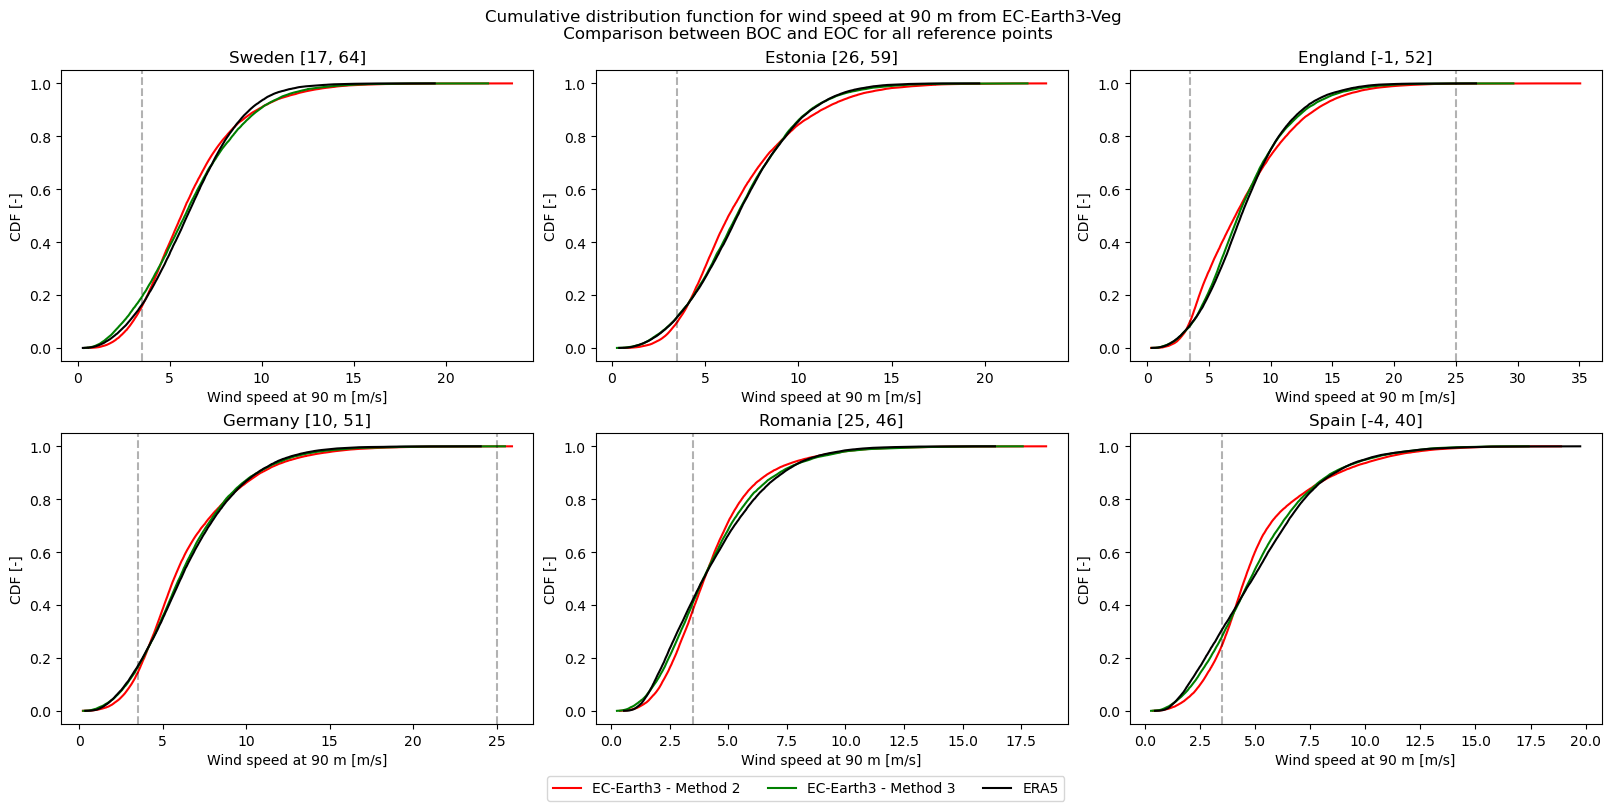

In [52]:
### WND90M ########
variable = "wnd90m"
CMIP6_model = CMIP6_models_wind[8]
bins = 30

point_1 = (17,64)
point_2 = (26,59)
point_3 = (-1,52)
point_4 = (10,51)
point_5 = (25,46)
point_6 = (-4,40)

ref_country = ['Sweden', 'Estonia', 'England', 'Germany', 'Romania', 'Spain']

legend_mod = False;
ssp_variant = 'ssp585'
fig,axs = plt.subplots(2,3,figsize=(16,8),layout='constrained')
title = f'Cumulative distribution function for wind speed at 90 m from {CMIP6_model} \n Comparison between BOC and EOC for all reference points'
fig.suptitle(title)

for ii in range(6):
    legend = []
    point_name = f'point_{ii+1}';
    point = locals()[point_name];
    country_name = ref_country[ii]
    CMIP6_model =CMIP6_model.replace('-','_')
    plotcolor = model_colors.loc[CMIP6_model.replace('_','-')]['Color']

    # data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_15_22_{variable}"].sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data = locals()[f"Corrected_Europe_EC_Earth3_ssp585_15_22_wnd90m"].sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data_sorted_EC_Earth3_method2 = np.sort(data)
    # calculate the proportional values of samples
    p_EC_Earth3_method2 = 1. * np.arange(len(data)) / (len(data) - 1)
    axs.flat[ii].plot(data_sorted_EC_Earth3_method2, p_EC_Earth3_method2,c='red',linestyle='-')
    max_method2 = max(data.values)
    
    # data = locals()[f"Corrected_Europe_{CMIP6_model}_ssp585_70_99_{variable}"].sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data = locals()[f"Europe_EC_Earth3_ssp585_15_22_wnd90m_power_law_GWA_corrected_no_indicator_matrix"].sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data_sorted_EC_Earth3_method3 = np.sort(data)
    # calculate the proportional values of samples
    p_EC_Earth3_method3 = 1. * np.arange(len(data)) / (len(data) - 1)
    axs.flat[ii].plot(data_sorted_EC_Earth3_method3, p_EC_Earth3_method3,c='green',linestyle = '-')   
    max_method3 = max(data.values)
    
    data = Europe_era5_15_22_wnd90m_3hr_corrected.sel(x=point[0],y=point[1]).dropna(dim="time",how='any')
    data_sorted_era5 = np.sort(data)
    # calculate the proportional values of samples
    p_era5 = 1. * np.arange(len(data)) / (len(data) - 1)
    axs.flat[ii].plot(data_sorted_era5, p_era5,c='black',linestyle = '-')   
    max_era5 = max(data.values)
    
    axs.flat[ii].axvline(x=3.5,color='black',linestyle='--',alpha=0.3)
    
    if max_era5 > 25 or max_method2 > 25 or max_method3 > 25: 
        axs.flat[ii].axvline(x=25,color='black',linestyle='--',alpha=0.3)

    axs.flat[ii].set_ylabel('CDF [-]')
    axs.flat[ii].set(xlabel='Wind speed at 90 m [m/s]')
    axs.flat[ii].set_title(f'{country_name} [{point[0]}, {point[1]}]')

fig.legend([f"EC-Earth3 - Method 2",f"EC-Earth3 - Method 3",'ERA5'],ncols=3,loc='outside lower center')

In [56]:

# Save plot above?
filepath = f"C://Users/Theag/OneDrive - Aarhus Universitet\Master Project - shared folder/Figures/BOC/CDF/CDF_{variable}_EC_Earth3_meth2_vs_meth3_all_refpoints.png"
fig.savefig(filepath,dpi=300,bbox_inches='tight')
filepath

'C://Users/Theag/OneDrive - Aarhus Universitet\\Master Project - shared folder/Figures/BOC/CDF/CDF_wnd90m_EC_Earth3_meth2_vs_meth3_all_refpoints.png'